Homework 1 Report
==================================================
Note that the professor verbally mentioned that it was recommended to include both the explanations of the answers to the homework as well as the source code and plots needed for the homework in one single report. Therefore, the content in this report contains the answers and explanations for the homework as well as the underlying source code needed to provide these answers.


- The GitHub link to the Assignment Repository is :
- https://github.com/tmasse11/ECGR_5101

- The GitHub link to the Jupyter Notebook is : 
- 


Author: Terrill Earl Massey
Student ID: 800670388


The resulting sections will cover explanations, code, and plots pertaining to PROBLEM 1 of the homework. 
===========================================================================================================================
1a: The task is to develop a gradient descent training and evaluation code that predicts housing price based on the following input variables.

 - area
 - bedrooms
 - bathrooms
 - stories
 - parking
 


To achieve this task,  we shall first read in and format the input explanatory values and output values.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

housing_data = pd.DataFrame(pd.read_csv(r"/home/terrill/ECGR_5102/Assignment2/Housing.csv")) # Read in the Housing Data Dataset
M = len(housing_data) # Number of training Points
print("Number of Training Points", M)
print("") # For display 
housing_data.info() # Display data types of the input variables.
print("")
print("================================")
housing_data.head()


Number of Training Points 545

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


The next step is to format the input variables with binary classification to a format that can be used by a regression line. This is done by converting inputs with "yes" or "no" values to 1 and 0s respectively.

In [2]:
input_variable_with_binary_classification = [ 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

#Mapping function for "yes" "no" values to "1" and "0" values.
def binary_map(x):
    return x.map({'yes': 1, "no" : 0})

# Apply mapping function to the housing dataset.
housing_data[input_variable_with_binary_classification] = housing_data[input_variable_with_binary_classification].apply(binary_map)
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


The next step is to split the housing dataset into a training dataset and validation dataset.

In [3]:
np.random.seed()
df_training, df_validation = train_test_split(housing_data, train_size=0.7, test_size=0.3, random_state=42)
print("Training Dataset Shape: ", df_training.shape)
print("Validation Dataset Shape: ", df_validation.shape)

M_training = len(df_training) # Training points in training dataset.
M_validation = len(df_validation) # Validation points in valdiation dataset.
df_validation.head()

Training Dataset Shape:  (381, 13)
Validation Dataset Shape:  (164, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,4060000,5900,4,2,2,0,0,1,0,0,1,0,unfurnished
77,6650000,6500,3,2,3,1,0,0,0,1,0,1,furnished
360,3710000,4040,2,1,1,1,0,0,0,0,0,0,semi-furnished
90,6440000,5000,3,1,2,1,0,0,0,1,0,0,semi-furnished
493,2800000,3960,3,1,1,1,0,0,0,0,0,0,furnished


Now that we have extracted the training dataspace from the housing dataset, the next step is to extract the input explanatory variables asked in question 1a.

In [4]:
input_vars_of_interest = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
df_training_1a = df_training[input_vars_of_interest] # Training Dataset for question 1a.
df_validation_1a = df_validation[input_vars_of_interest] # Validation Dataset for question 1a.
df_training_1a.head()


,area,bedrooms,bathrooms,stories,parking
126,7160,3,1,1,2
363,3584,2,1,1,0
370,4280,2,1,1,2
31,7000,3,1,4,2
113,9620,3,1,1,2


The next step is to define the Loss function and Gradient Descent Algorithm for the training dataset.

In [5]:
def calc_loss(x, y, theta):
    "Compute the loss for linear regression"
    "The loss function used is M.S.E."
    
    """
    Inputs
    ========
    X: 2D array where each column represents explanatory features and each column represents training data point.
    y: 1D array that represents the expected values/labels of the model. Each row repreents a training data point.(1xM)
    theta: 1D array of fitting weights/parameters. (1xn)
    
    Outputs
    ======================
    J : Scalar value that represnts the loss of the function given an explanatory value set and theta values. 
    """
    
    M = len(y)
    h_of_x = x.dot(theta).astype('longdouble') # obtain the predictions of the model. Also referred to as H(x)
    
    errors = np.subtract(h_of_x, y).astype('longdouble') # subtract the predictions from the labels/expected values. 
    
    errors_sqred = np.square(errors).astype('longdouble') #square the errors. 
    
    J = 1/(2*M) * np.sum(errors_sqred).astype('longdouble') #perform a summation on   (h(x_i) - y_i)^2 for all training points. 
    return J

    

In [6]:
def gradient_descent_algorithm(x_training_set,y_training_set, x_validation_set, y_validation_set,theta,learning_rate, epochs):
    """
    Compute the loss for linear regression using the gradient descent approach. 
    
    Input Parameters
    ---------------------------------------
    x_training_set: 2D array where each row represents a training point and each column represent a training feature(i.e. X1, X2, X3). This is used for training/fitting the linear model.
    y_training_set: 1D array of training labels/target values. Each row represents a label for a training point/epoch.This is used for training/fitting the linear model.
    x_valdiation_set: 2D array where each row represents a training point and each column represent a training feature(i.e. X1, X2, X3). This is used for validating the linear model.
    y_validation_set: 1D array of training labels/target values. Each row represents a label for a training point/epoch.This is used for validating the linear model.
    theta: 1D array of weights. (1xn)
    learning_rate : Scalar value that represents the alpha scale in the gradient descent formula.
    epochs: Scalar value that represents the number of iterations used in the gradient descent algorithm.
    
    Output Parameters
    ----------------------------------------
    theta : 1D Array of fitting parameters/weights. Dimension (1xn)
    training_loss_history : 1D array that contains cost value for each iteration/epoch. Dimension(Mx1) where M = Number of Training data points. This represents the loss of the model during training.
    validation_loss_history : 1D array that contains cost value for each iteration/epoch. Dimension(Mx1) where M = Number of Training data points. This represents the loss of the model during validation.
    """
    training_loss_history = np.zeros(epochs) # Create a 1D array that will hold the loss history of the model being fitted to the training dataset throughout the gradient descent algorithm. 
    validation_loss_history = np.zeros(epochs) # Create a 1D array that will hold the loss history as the model is being evaluated through the validation dataset.
    M_training = len(y_training_set) # Get M Value for Training Set
    for i in range(0,epochs):     
        h_0 = x_training_set.dot(theta) # obtain the predictions of the model. Also referred to as H(x)
        errors = np.subtract(h_0, y_training_set)  # subtract the predictions from the labels/expected values. 
        summation_errors = (learning_rate/M_training) * x_training_set.transpose().dot(errors) # Sum all of the errors and then multiply  by alpha/M
        theta  = theta - summation_errors # Update the current theta values.
        training_loss_history[i] = calc_loss(x_training_set,y_training_set,theta) #Add to the training_loss_history tracker.
        validation_loss_history[i] = calc_loss(x_validation_set, y_validation_set, theta) # Add to the validation_loss_history tracker.
        
    return theta, training_loss_history, validation_loss_history
    

Now that we have defined the gradient descent algorithm, we shall now find theta values that fit the linear regression format : H(x) = $\theta_{0}$ + $\theta_{1}$*X1 + $\theta_{2}$*X2 + $\theta_{3}$*X3 + $\theta_{4}$*X4 + $\theta_{5}$*X5

where :
- X1 Represents area
- X2 Represents bedrooms
- X3 Represents bathrooms
- X4 Represents stories
- X5 Represents parking


In [7]:
# Create x_training and y_training datasets for training of the model.
x0 = np.ones((M_training,1)) # Used for multiplication with Theta_0  in calculating the cost value and in the gradient descent algorithm.
x1 = df_training_1a.values[:, 0] # Explanatory Value X1 
x2 = df_training_1a.values[:, 1] # Explanatory Value X2
x3 = df_training_1a.values[:, 2] # Explanatory Value X3
x4 = df_training_1a.values[:, 3] # Explanatory Value X4
x5 = df_training_1a.values[:, 4] # Explanatory Value X5
x1 = x1.reshape(M_training,1)
x2 = x2.reshape(M_training,1)
x3 = x3.reshape(M_training,1)
x4 = x4.reshape(M_training,1)
x5 = x5.reshape(M_training,1)
x_training = np.hstack((x0, x1, x2, x3, x4, x5))
y_training = df_training.values[:, 0]

#Create x_validation and y_validation training datasets for validation of the model.
x0 = np.ones((M_validation,1)) # Used for multiplication with Theta_0  in calculating the cost value and in the gradient descent algorithm.
x1 = df_validation_1a.values[:, 0] # Explanatory Value X1 
x2 = df_validation_1a.values[:, 1] # Explanatory Value X2
x3 = df_validation_1a.values[:, 2] # Explanatory Value X3
x4 = df_validation_1a.values[:, 3] # Explanatory Value X4
x5 = df_validation_1a.values[:, 4] # Explanatory Value X5
x1 = x1.reshape(M_validation,1)
x2 = x2.reshape(M_validation,1)
x3 = x3.reshape(M_validation,1)
x4 = x4.reshape(M_validation,1)
x5 = x5.reshape(M_validation,1)
x_validation = np.hstack((x0, x1, x2, x3, x4, x5))
y_validation = df_validation.values[:, 0]


Now perform graident descent algorithm on input explanatory values. 
Note: During the gradient descent algorithm, we are training the linear model as well as validating the linear model for a specified amount of iterations.

In [8]:
theta_values = np.zeros(6) # Theta values initalized to 0.
epochs = 1000 # initial epoch count. 
alpha = 0.01 # Initial learning rate.
theta_values, training_loss_history, validation_loss_history = gradient_descent_algorithm(x_training, y_training,x_validation,y_validation,theta_values,alpha, epochs)
print("Final Theta Values: ",  theta_values)


<ipython-input-6-2ea3954b5929>:28: RuntimeWarning: invalid value encountered in subtract
  theta  = theta - summation_errors # Update the current theta values.


Final Theta Values:  [nan nan nan nan nan nan]


Notice that with the current input parameters, the gradient descent algorithm does not converge. It is suspected that this is due to the difference in scale between the area input variable and the rest of the input variables. Therefore we shall try to perform a gradient descent without using area as an input variable. 

In [9]:
# Create x_training and y_training datasets for training of the model.
x0 = np.ones((M_training,1)) # Used for multiplication with Theta_0  in calculating the cost value and in the gradient descent algorithm.
x1 = df_training_1a.values[:, 0] # Explanatory Value X1 
x2 = df_training_1a.values[:, 1] # Explanatory Value X2
x3 = df_training_1a.values[:, 2] # Explanatory Value X3
x4 = df_training_1a.values[:, 3] # Explanatory Value X4
x5 = df_training_1a.values[:, 4] # Explanatory Value X5
x1 = x1.reshape(M_training,1)
x2 = x2.reshape(M_training,1)
x3 = x3.reshape(M_training,1)
x4 = x4.reshape(M_training,1)
x5 = x5.reshape(M_training,1)
x_training = np.hstack((x0, x2, x3, x4, x5)) # Remove area input variable
y_training = df_training.values[:, 0]

#Create x_validation and y_validation training datasets for validation of the model.
x0 = np.ones((M_validation,1)) # Used for multiplication with Theta_0  in calculating the cost value and in the gradient descent algorithm.
x1 = df_validation_1a.values[:, 0] # Explanatory Value X1 
x2 = df_validation_1a.values[:, 1] # Explanatory Value X2
x3 = df_validation_1a.values[:, 2] # Explanatory Value X3
x4 = df_validation_1a.values[:, 3] # Explanatory Value X4
x5 = df_validation_1a.values[:, 4] # Explanatory Value X5
x1 = x1.reshape(M_validation,1)
x2 = x2.reshape(M_validation,1)
x3 = x3.reshape(M_validation,1)
x4 = x4.reshape(M_validation,1)
x5 = x5.reshape(M_validation,1)
x_validation = np.hstack((x0, x2, x3, x4, x5)) # Remove area input variable.
y_validation = df_validation.values[:, 0]

theta_values = np.zeros(5) # Theta values initalized to 0.
epochs = 3000# initial epoch count. 
alpha = 0.01 # Initial learning rate.
theta_values, training_loss_history, validation_loss_history = gradient_descent_algorithm(x_training,
                                                                                          y_training,
                                                                                          x_validation,
                                                                                          y_validation,
                                                                                          theta_values,
                                                                                          alpha,
                                                                                          epochs)

gradient_descent_inputs_1a = {} # Gradient Descent Output Metrics for  Input Variables in Problem 1a.
gradient_descent_inputs_1a['theta_values'] = theta_values
gradient_descent_inputs_1a['training_loss_history'] = training_loss_history
gradient_descent_inputs_1a['validation_loss_history'] = validation_loss_history
gradient_descent_inputs_1a['alpha'] = alpha
gradient_descent_inputs_1a['epochs'] = epochs


linear_regression_model_str = "H(x) = "

for indx,theta in enumerate(gradient_descent_inputs_1a['theta_values']):
    print("Theta_{} Value: {:.5f}".format(indx, theta))
    if indx == 0:
        linear_regression_model_str += "{:.5f}".format(theta)
    else:
        linear_regression_model_str += " + {:.5f}*X{}".format(theta, indx)
print("==============================================")
print("Final Linear Regression Model") # Print String representation of linear regression model.
print(linear_regression_model_str)
print("===============================================")



Theta_0 Value: 937254.35229
Theta_1 Value: 263112.16694
Theta_2 Value: 1405836.20309
Theta_3 Value: 464744.51953
Theta_4 Value: 650737.39510
Final Linear Regression Model
H(x) = 937254.35229 + 263112.16694*X1 + 1405836.20309*X2 + 464744.51953*X3 + 650737.39510*X4


<b> Answer to 1a </b> The answer to 1a is located within the code block immediately below.

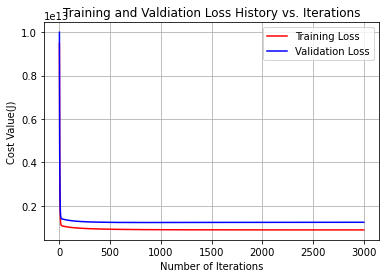

Final Training Loss Value : 884230392903.4537
Final Validation Loss Value:  1236027781066.8718


In [10]:
# Plot the Loss History during training and validation as convergence is made with the gradient descent algorithm.
epochs = gradient_descent_inputs_1a['epochs']
plt.plot(range(1, epochs+1), gradient_descent_inputs_1a['training_loss_history'], label="Training Loss", color='red')
plt.plot(range(1, epochs+1), gradient_descent_inputs_1a['validation_loss_history'], label="Validation Loss", color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Value(J)")
plt.legend()
plt.title("Training and Valdiation Loss History vs. Iterations")
plt.show()
print("Final Training Loss Value :", training_loss_history[-1])
print("Final Validation Loss Value: ", validation_loss_history[-1])

=======================================================================================================================================

<b>Question 1b</b>: The task is to develop a gradient descent training and evaluation code that predicts housing price based on the following input variables.

 - area
 - bedrooms
 - bathrooms
 - stories
 - mainroad
 - guestroom
 - basement
 - hotwaterheating
 - airconditioning
 
 

The first step is to obtain the training and validation sets for the desired input variables.
Note that the training and validation sets have already been extracted from the housing dataset in 1a. Therefore, we can re-use these training and validation sets for our input explanatory values of interest.

In [11]:
input_vars_of_interest = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning']
df_training_1b = df_training[input_vars_of_interest] # Training Dataset for question 1a.
df_validation_1b = df_validation[input_vars_of_interest] # Validation Dataset for question 1a.
df_training_1b.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning
126,7160,3,1,1,1,0,1,0,0
363,3584,2,1,1,1,0,0,1,0
370,4280,2,1,1,1,0,0,0,1
31,7000,3,1,4,1,0,0,0,1
113,9620,3,1,1,1,0,1,0,0


The next step is to determine the best theta values using gradient descent. The linear model will be in the form of 
H(x) = $\theta_{0}$ + $\theta_{1}$*X1 + $\theta_{2}$*X2 + $\theta_{3}$*X3 + $\theta_{4}$*X4 + $\theta_{5}$*X5 + $\theta_{6}$*X6 + $\theta_{7}$*X7 + $\theta_{8}$*X8   

where :
- X1 Represents bedrooms
- X2 Represents bathrooms
- X3 Represents stories
- X4 Represents mainroad
- X5 Represents guestroom
- X6 Represents basement
- X7 Represents hotwaterheating
- X8 Represents airconditioning

Note: that it was identified in 1a that the gradient descent algorithm does not converge when the "area" input variable is considered in training. This is due to the vast difference in scale between area and the rest of the input explanatory variables. Therefore we will need to train the model without the "area" input variable.


Note: that the gradient descent algorithm and cost functions have already been defined for problem 1a. Therefore we will re-use these two functions for this problem(1b). 



In [12]:
# Create x_training and y_training datasets for training of the model.
x0 = np.ones((M_training,1)) # Used for multiplication with Theta_0  in calculating the cost value and in the gradient descent algorithm.
x1 = df_training_1b.values[:, 1] # Explanatory Value X1 
x2 = df_training_1b.values[:, 2] # Explanatory Value X2
x3 = df_training_1b.values[:, 3] # Explanatory Value X3
x4 = df_training_1b.values[:, 4] # Explanatory Value X4
x5 = df_training_1b.values[:, 5] # Explanatory Value X5
x6 = df_training_1b.values[:, 6] # Explanatory Value X6
x7 = df_training_1b.values[:, 7] # Explanatory Value X7
x8 = df_training_1b.values[:, 8] # Explanatory Value X8
x1 = x1.reshape(M_training,1)
x2 = x2.reshape(M_training,1)
x3 = x3.reshape(M_training,1)
x4 = x4.reshape(M_training,1)
x5 = x5.reshape(M_training,1)
x6 = x6.reshape(M_training,1)
x7 = x7.reshape(M_training,1)
x8 = x8.reshape(M_training,1)

x_training = np.hstack((x0, x1, x2, x3, x4, x5,x6, x7, x8))
y_training = df_training.values[:, 0]

#Create x_validation and y_validation training datasets for validation of the model.
x0 = np.ones((M_validation,1)) # Used for multiplication with Theta_0  in calculating the cost value and in the gradient descent algorithm.
x1 = df_validation_1b.values[:, 1] # Explanatory Value X1 
x2 = df_validation_1b.values[:, 2] # Explanatory Value X2
x3 = df_validation_1b.values[:, 3] # Explanatory Value X3
x4 = df_validation_1b.values[:, 4] # Explanatory Value X4
x5 = df_validation_1b.values[:, 5] # Explanatory Value X5
x6 = df_validation_1b.values[:, 6] # Explanatory Value X6
x7 = df_validation_1b.values[:, 7] # Explanatory Value X7
x8 = df_validation_1b.values[:, 8] # Explanatory Value X8
x1 = x1.reshape(M_validation,1)
x2 = x2.reshape(M_validation,1)
x3 = x3.reshape(M_validation,1)
x4 = x4.reshape(M_validation,1)
x5 = x5.reshape(M_validation,1)
x6 = x6.reshape(M_validation,1)
x7 = x7.reshape(M_validation,1)
x8 = x8.reshape(M_validation,1)
x_validation = np.hstack((x0, x1, x2, x3, x4, x5, x6, x7, x8))
y_validation = df_validation.values[:, 0]

In [13]:
# Perform Gradient Descent
theta_values = np.zeros(9) # Theta values initalized to 0. This array represent theta_0  through theta_9
epochs = 5000 # initial epoch count. 
alpha = 0.01 # Initial learning rate.
theta_values, training_loss_history, validation_loss_history = gradient_descent_algorithm(x_training,
                                                                                          y_training,
                                                                                          x_validation,
                                                                                          y_validation,
                                                                                          theta_values,
                                                                                          alpha, 
                                                                                          epochs)


gradient_descent_inputs_1b= {} # Gradient Descent Output Metrics for  Input Variables in Problem 1b.
gradient_descent_inputs_1b['theta_values'] = theta_values
gradient_descent_inputs_1b['training_loss_history'] = training_loss_history
gradient_descent_inputs_1b['validation_loss_history'] = validation_loss_history
gradient_descent_inputs_1b['alpha'] = alpha
gradient_descent_inputs_1b['epochs'] = epochs



for indx,theta in enumerate(gradient_descent_inputs_1b['theta_values']):
    print("Theta_{} Value: {:.5f}".format(indx, theta))
    if indx == 0:
        linear_regression_model_str += "{:.5f}".format(theta)
    else:
        linear_regression_model_str += " + {:.5f}*X{}".format(theta, indx)
print("==============================================")
print("Final Linear Regression Model") # Print String representation of linear regression model.
print(linear_regression_model_str)
print("===============================================")



Theta_0 Value: 252928.72897
Theta_1 Value: 222076.42123
Theta_2 Value: 1328539.50738
Theta_3 Value: 305342.60921
Theta_4 Value: 1155905.52588
Theta_5 Value: 532796.95259
Theta_6 Value: 473830.27823
Theta_7 Value: 746427.40974
Theta_8 Value: 1026266.41104
Final Linear Regression Model
H(x) = 937254.35229 + 263112.16694*X1 + 1405836.20309*X2 + 464744.51953*X3 + 650737.39510*X4252928.72897 + 222076.42123*X1 + 1328539.50738*X2 + 305342.60921*X3 + 1155905.52588*X4 + 532796.95259*X5 + 473830.27823*X6 + 746427.40974*X7 + 1026266.41104*X8


<b>Answer to 1b. </b> The following sections are considered the answer to 1b.

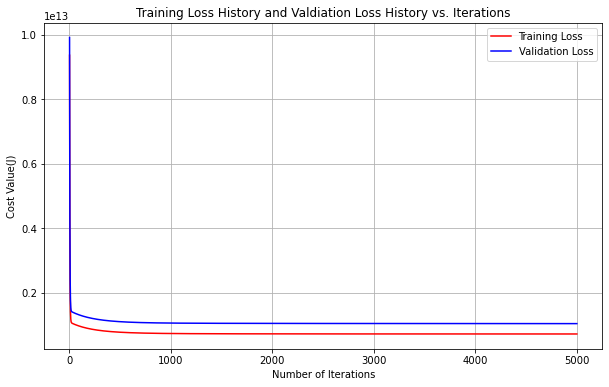

Final Training Loss Value : 723476311533.3629
Final Validation Loss Value:  1044229719736.3013


In [14]:
# Plot the Loss History during training and validation as convergence is made with the gradient descent algorithm.
epochs = gradient_descent_inputs_1b['epochs']
plt.plot(range(1, epochs+1), training_loss_history, label="Training Loss", color='red')
plt.plot(range(1, epochs+1), validation_loss_history, label="Validation Loss", color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Value(J)")
plt.legend()
plt.title("Training Loss History and Valdiation Loss History vs. Iterations")
plt.show()
print("Final Training Loss Value :", training_loss_history[-1])
print("Final Validation Loss Value: ", validation_loss_history[-1])

<u>Comparison of linear regression models in 1a and 1b </u>: Because of the large differences in scales between the explanatory input values, the final validation and training loss determined in both 1a and 1b are extremely high. The trends of training and validation losses as iterations are increased are very similar between 1a and 1b. The trend for both the training and validation loss is that the loss is realivetly high at first, however as the number of iterations(epochs) is increased during training, the training and validation loss decrease. However, as the iterations continues to increase, the training and validation loss values become constant(as indicated by the flat line in the figure above). This indicates that convergence within training has been made.

The resulting sections will cover explanations, code, and plots pertaining to PROBLEM 2 of the homework. 
===========================================================================================================================
<b>2a</b>: The task is to develop a gradient descent training and evaluation code that predicts housing price based on the following input variables that are Min Max Scaled(Normalized) and Standardized.
 - area
 - bedrooms
 - bathrooms
 - stories
 - parking
 
 One gradient descent algorithm will be performed for a variant of the input values that are Min Max Scaled, and another gradient descent algorithm will be performed for a standardized variant of the input values.

First we must ingest the input data from the housing csv file. Afterwards we shall map "yes" "no" values to "1" and "0" respectively. Then we shall split the input datasets into training and validation subsets.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

housing_data = pd.DataFrame(pd.read_csv(r"/home/terrill/ECGR_5102/Assignment2/Housing.csv")) # Read in the Housing Data Dataset
print("") # For display 
print("Raw Dataset Display: ")
print("================================")
print(housing_data.head()) 
print("")
print("================================")


input_variable_with_binary_classification = [ 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

#Mapping function for "yes" "no" values to "1" and "0" values.
def binary_map(x):
    return x.map({'yes': 1, "no" : 0})

# Apply mapping function to the housing dataset.
housing_data[input_variable_with_binary_classification] = housing_data[input_variable_with_binary_classification].apply(binary_map)

# Randomly split dataset into training and validation subset.
np.random.seed()
df_training, df_validation = train_test_split(housing_data, train_size=0.7, test_size=0.3, random_state=42)
M_training = len(df_training)
M_validation = len(df_validation)
print("Training Dataset Shape: ", df_training.shape)
print("Validation Dataset Shape: ", df_validation.shape)
print("=====================================")



# Select data that pertain to the input variables of interest.
vars_of_interest = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_training_2a = df_training[vars_of_interest] # Training Dataset for question 2a.
df_validation_2a = df_validation[vars_of_interest] # Validation Dataset for question 2a.
print("") # For formatting
print("Excerpt from Training Dataset: ")
print(df_training_2a.head())
print("==========================================")
print("Excerpt from Validation Dataset: ")
print(df_validation_2a.head())


Raw Dataset Display: 
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Training Dataset Shape:  (381, 13)
Validation Dataset Shape:  (164, 13)

Ex

The next step is to pre-process the training and validation data with Input normalization. Two seperate training datasets and validation sets will be constructed. One training, validation pair for min_max_scale, and another training, validation pair for input standardization scale with a desired mean of 0 and a desired variance of 1.

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Define Min Max Scaler
min_max_scaler = MinMaxScaler()
df_training_2a_min_max_scaled = df_training_2a.copy()
df_validation_2a_min_max_scaled = df_validation_2a.copy()
df_training_2a_min_max_scaled[vars_of_interest] = min_max_scaler.fit_transform(df_training_2a_min_max_scaled[vars_of_interest])
df_validation_2a_min_max_scaled[vars_of_interest] = min_max_scaler.fit_transform(df_validation_2a_min_max_scaled[vars_of_interest])

# Define Standardized Scaler
standardized_scaler = StandardScaler()
df_training_2a_standardized = df_training_2a.copy()
df_validation_2a_standardized = df_validation_2a.copy()
df_training_2a_standardized[vars_of_interest] = standardized_scaler.fit_transform(df_training_2a_standardized[vars_of_interest])
df_validation_2a_standardized[vars_of_interest] = standardized_scaler.fit_transform(df_validation_2a_standardized[vars_of_interest])


print("Training Dataset Min Max Scaled: ")
print(df_training_2a_min_max_scaled.head())
print("") # For formatting
print("====================================================")
print("Training Dataset with Input Standardization: ")
print(df_training_2a_standardized.head())
print("") # For formatting

Training Dataset Min Max Scaled: 
         area  bedrooms  bathrooms  stories   parking     price
126  0.378694       0.4        0.0      0.0  0.666667  0.393333
363  0.132921       0.2        0.0      0.0  0.000000  0.186667
370  0.180756       0.2        0.0      0.0  0.666667  0.180000
31   0.367698       0.4        0.0      1.0  0.666667  0.633333
113  0.547766       0.4        0.0      0.0  0.666667  0.412667

Training Dataset with Input Standardization: 
         area  bedrooms  bathrooms   stories   parking     price
126  0.934301  0.055861  -0.553238 -0.907660  1.591603  0.630538
363 -0.710246 -1.274325  -0.553238 -0.907660 -0.800511 -0.593759
370 -0.390167 -1.274325  -0.553238 -0.907660  1.591603 -0.633253
31   0.860719  0.055861  -0.553238  2.573733  1.591603  2.052301
113  2.065617  0.055861  -0.553238 -0.907660  1.591603  0.745068



The next step is to define the gradient descent algorithm for both pairs of training datasets. Note that the gradient descent algorithm and cost function has already been defined in problem 1. However for the sake of legibility, we shall re-define these functions below.

In [17]:
def calc_loss(x, y, theta):
    "Compute the loss for linear regression"
    "The loss function used is M.S.E."
    
    """
    Inputs
    ========
    X: 2D array where each column represents explanatory features and each column represents training data point.
    y: 1D array that represents the expected values/labels of the model. Each row repreents a training data point.(1xM)
    theta: 1D array of fitting weights/parameters. (1xn)
     
    
    Outputs
    ======================
    J : Scalar value that represnts the loss of the function given an explanatory value set and theta values. 
    """
    M = len(y) # Get M Value.
    h_of_x = x.dot(theta)# obtain the predictions of the model. Also referred to as H(x)
    
    errors = np.subtract(h_of_x, y)# subtract the predictions from the labels/expected values. 
    
    errors_sqred = np.square(errors)#square the errors. 
    
    J = 1/(2*M) * np.sum(errors_sqred) #perform a summation on   (h(x_i) - y_i)^2 for all training points. 
    return J


In [18]:
def gradient_descent_algorithm(x_training_set,y_training_set, x_validation_set, y_validation_set,theta,learning_rate, epochs):
    """
    Compute the loss for linear regression using the gradient descent approach. 
    
    Input Parameters
    ---------------------------------------
    x_training_set: 2D array where each row represents a training point and each column represent a training feature(i.e. X1, X2, X3). This is used for training/fitting the linear model.
    y_training_set: 1D array of training labels/target values. Each row represents a label for a training point/epoch.This is used for training/fitting the linear model.
    x_valdiation_set: 2D array where each row represents a training point and each column represent a training feature(i.e. X1, X2, X3). This is used for validating the linear model.
    y_validation_set: 1D array of training labels/target values. Each row represents a label for a training point/epoch.This is used for validating the linear model.
    theta: 1D array of weights. (1xn)
    learning_rate : Scalar value that represents the alpha scale in the gradient descent formula.
    epochs: Scalar value that represents the number of iterations used in the gradient descent algorithm.
    
    Output Parameters
    ----------------------------------------
    theta : 1D Array of fitting parameters/weights. Dimension (1xn)
    training_loss_history : 1D array that contains cost value for each iteration/epoch. Dimension(Mx1) where M = Number of Training data points. This represents the loss of the model during training.
    validation_loss_history : 1D array that contains cost value for each iteration/epoch. Dimension(Mx1) where M = Number of Training data points. This represents the loss of the model during validation.
    """
    training_loss_history = np.zeros(epochs)# Create a 1D array that will hold the loss history of the model being fitted to the training dataset throughout the gradient descent algorithm. 
    validation_loss_history = np.zeros(epochs) # Create a 1D array that will hold the loss history as the model is being evaluated through the validation dataset.
    M_training = len(y_training_set)
    for i in range(0,epochs):     
        h_0 = x_training_set.dot(theta) # obtain the predictions of the model. Also referred to as H(x)
        errors = np.subtract(h_0, y_training_set)  # subtract the predictions from the labels/expected values. 
        summation_errors = (learning_rate/M_training) * x_training_set.transpose().dot(errors) # Sum all of the errors and then multiply  by alpha/M
        theta  = theta - summation_errors # Update the current theta values.
        training_loss_history[i] = calc_loss(x_training_set,y_training_set,theta) #Add to the training_loss_history tracker.
        validation_loss_history[i] = calc_loss(x_validation_set, y_validation_set, theta) # Add to the validation_loss_history tracker.
        
    return theta, training_loss_history, validation_loss_history
    

The next step is to determine the theta values of the linear model. The linear model will be in the form of  H(x) = $\theta_{0}$ + $\theta_{1}$*X1 + $\theta_{2}$*X2 + $\theta_{3}$*X3 + $\theta_{4}$*X4 + $\theta_{5}$*X5

where :
- X1 Represents area
- X2 Represents bedrooms
- X3 Represents bathrooms
- X4 Represents stories
- X5 Represents parking

In [19]:
# Create x_training and y_training datasets for training of the model.
x0 = np.ones((M_training,1)) # Used for multiplication with Theta_0  in calculating the cost value and in the gradient descent algorithm.
x1 = df_training_2a_min_max_scaled.values[:, 0] # Explanatory Value X1 
x2 = df_training_2a_min_max_scaled.values[:, 1] # Explanatory Value X2
x3 = df_training_2a_min_max_scaled.values[:, 2] # Explanatory Value X3
x4 = df_training_2a_min_max_scaled.values[:, 3] # Explanatory Value X4
x5 = df_training_2a_min_max_scaled.values[:, 4] # Explanatory Value X5
x1 = x1.reshape(M_training,1)
x2 = x2.reshape(M_training,1)
x3 = x3.reshape(M_training,1)
x4 = x4.reshape(M_training,1)
x5 = x5.reshape(M_training,1)
x_training_min_max_scaled = np.hstack((x0, x1, x2, x3, x4, x5))
y_training_min_max_scaled = df_training_2a_min_max_scaled.values[:, 5] # Price Values

#Create x_validation and y_validation training datasets for validation of the model.
x0 = np.ones((M_validation,1)) # Used for multiplication with Theta_0  in calculating the cost value and in the gradient descent algorithm.
x1 = df_validation_2a_min_max_scaled.values[:, 0] # Explanatory Value X1 
x2 = df_validation_2a_min_max_scaled.values[:, 1] # Explanatory Value X2
x3 = df_validation_2a_min_max_scaled.values[:, 2] # Explanatory Value X3
x4 = df_validation_2a_min_max_scaled.values[:, 3] # Explanatory Value X4
x5 = df_validation_2a_min_max_scaled.values[:, 4] # Explanatory Value X5
x1 = x1.reshape(M_validation,1)
x2 = x2.reshape(M_validation,1)
x3 = x3.reshape(M_validation,1)
x4 = x4.reshape(M_validation,1)
x5 = x5.reshape(M_validation,1)
x_validation_min_max_scaled = np.hstack((x0, x1, x2, x3, x4, x5))
y_validation_min_max_scaled = df_validation_2a_min_max_scaled.values[:,5] # Price Values


The next step is to choose the appropriate alpha value based on the final training and validation costs.

In [20]:

alpha_values = np.linspace(0.01, 0.10, 10) # Specifiy 10 alpha values from 0.01 to 0.10.
epochs = 15000
for alpha in alpha_values:
    # Define inital theta values.
    theta_values = np.zeros(6) # represents [theta0, theta1, theta2, theta3, theta4, theta5]
    theta_values, training_loss_history_for_min_max_scale, validation_loss_history_for_min_max_scale = gradient_descent_algorithm(x_training_min_max_scaled, 
                                                                                                                                  y_training_min_max_scaled, 
                                                                                                                                  x_validation_min_max_scaled,
                                                                                                                                  y_validation_min_max_scaled,
                                                                                                                                  theta_values,alpha, epochs)
    
    print("Alpha Value: {:.3f}".format(alpha))
    print("Final Training Loss Value : {:.5f}".format(training_loss_history_for_min_max_scale[-1]))
    print("Final Validation Loss Value: {:.5f}".format(validation_loss_history_for_min_max_scale[-1]))
    print("Final Validation Loss - Final Training Loss: {:.5f}".format(validation_loss_history_for_min_max_scale[-1] - training_loss_history_for_min_max_scale[-1]))
    print("========================================")
    # Plot the Loss History during training and validation as convergence is made with the gradient descent algorithm.



Alpha Value: 0.010
Final Training Loss Value : 0.00599
Final Validation Loss Value: 0.01145
Final Validation Loss - Final Training Loss: 0.00545
Alpha Value: 0.020
Final Training Loss Value : 0.00599
Final Validation Loss Value: 0.01189
Final Validation Loss - Final Training Loss: 0.00590
Alpha Value: 0.030
Final Training Loss Value : 0.00599
Final Validation Loss Value: 0.01193
Final Validation Loss - Final Training Loss: 0.00595
Alpha Value: 0.040
Final Training Loss Value : 0.00599
Final Validation Loss Value: 0.01194
Final Validation Loss - Final Training Loss: 0.00595
Alpha Value: 0.050
Final Training Loss Value : 0.00599
Final Validation Loss Value: 0.01194
Final Validation Loss - Final Training Loss: 0.00595
Alpha Value: 0.060
Final Training Loss Value : 0.00599
Final Validation Loss Value: 0.01194
Final Validation Loss - Final Training Loss: 0.00595
Alpha Value: 0.070
Final Training Loss Value : 0.00599
Final Validation Loss Value: 0.01194
Final Validation Loss - Final Training

Based on the training and validation losses above, it is determined that the alpha value of 0.01 produced the lowest validation cost/loss. Because of this, the alpha value of 0.01 was selected for the training model that represents the MinMax scaled input explanatory values. With an alpha value of 0.01, we are able to produce the theta values for the linear model in the immediate code block below. 



In [21]:
theta_values = np.zeros(6) # represents [theta0, theta1, theta2, theta3, theta4, theta5]
alpha = 0.01
epochs = 15000
theta_values, training_loss_history, validation_loss_history = gradient_descent_algorithm(x_training_min_max_scaled, 
                                                                                          y_training_min_max_scaled,
                                                                                          x_validation_min_max_scaled,                           
                                                                                          y_validation_min_max_scaled,
                                                                                          theta_values,
                                                                                          alpha,
                                                                                          epochs)






gradient_descent_norm_inputs_2a = {} # Gradient Descent Output Metrics for Normalized Input Variables in Problem 2a.
gradient_descent_norm_inputs_2a['theta_values'] = theta_values
gradient_descent_norm_inputs_2a['training_loss_history'] = training_loss_history
gradient_descent_norm_inputs_2a['validation_loss_history'] = validation_loss_history
gradient_descent_norm_inputs_2a['epochs'] = epochs
gradient_descent_norm_inputs_2a['alpha'] = alpha


linear_regression_model_str = "H(x) = "
for indx,theta in enumerate(gradient_descent_norm_inputs_2a['theta_values']):
    print("Theta_{} Value: {:.5f}".format(indx, theta))
    if indx == 0:
        linear_regression_model_str += "{:.5f}".format(theta)
    else:
        linear_regression_model_str += " + {:.5f}*X{}".format(theta, indx)
print("==============================================")
print("Final Linear Regression Model") # Print String representation of linear regression model.
print(linear_regression_model_str)
print("===============================================")

Theta_0 Value: 0.05713
Theta_1 Value: 0.43592
Theta_2 Value: 0.09016
Theta_3 Value: 0.33065
Theta_4 Value: 0.13474
Theta_5 Value: 0.11750
Final Linear Regression Model
H(x) = 0.05713 + 0.43592*X1 + 0.09016*X2 + 0.33065*X3 + 0.13474*X4 + 0.11750*X5


The next step is to perform the gradient descent algorithm on the standardized input explanatory values, and choose the appropriate alpha value based on the final costs produced.

In [22]:
# Create x_training and y_training datasets for training of the model.
x0 = np.ones((M_training,1)) # Used for multiplication with Theta_0  in calculating the cost value and in the gradient descent algorithm.
x1 = df_training_2a_standardized.values[:, 0] # Explanatory Value X1 
x2 = df_training_2a_standardized.values[:, 1] # Explanatory Value X2
x3 = df_training_2a_standardized.values[:, 2] # Explanatory Value X3
x4 = df_training_2a_standardized.values[:, 3] # Explanatory Value X4
x5 = df_training_2a_standardized.values[:, 4] # Explanatory Value X5
x1 = x1.reshape(M_training,1)
x2 = x2.reshape(M_training,1)
x3 = x3.reshape(M_training,1)
x4 = x4.reshape(M_training,1)
x5 = x5.reshape(M_training,1)
x_training_standardized = np.hstack((x0, x1, x2, x3, x4, x5)).astype('longdouble')
y_training_standardized = df_training_2a_standardized.values[:,5] # Price values


#Create x_validation and y_validation training datasets for validation of the model.
x0 = np.ones((M_validation,1)) # Used for multiplication with Theta_0  in calculating the cost value and in the gradient descent algorithm.
x1 = df_validation_2a_standardized.values[:, 0] # Explanatory Value X1 
x2 = df_validation_2a_standardized.values[:, 1] # Explanatory Value X2
x3 = df_validation_2a_standardized.values[:, 2] # Explanatory Value X3
x4 = df_validation_2a_standardized.values[:, 3] # Explanatory Value X4
x5 = df_validation_2a_standardized.values[:, 4] # Explanatory Value X5
x1 = x1.reshape(M_validation,1)
x2 = x2.reshape(M_validation,1)
x3 = x3.reshape(M_validation,1)
x4 = x4.reshape(M_validation,1)
x5 = x5.reshape(M_validation,1)
x_validation_standardized = np.hstack((x0, x1, x2, x3, x4, x5)).astype('longdouble')
y_validation_standardized = df_validation_2a_standardized.values[:, 5] # Price Values


In [23]:
alpha_values = np.linspace(0.01, 0.10, 10) # Specifiy 10 alpha values from 0.01 to 0.10.
epochs = 15000
print("Final Losses for Various Alpha Values during Training on Standarized Input Variables")
print("****************************************************************")
for alpha in alpha_values:
    # Define inital theta values.
    theta_values = np.zeros(6) # represents [theta0, theta1, theta2, theta3, theta4, theta5]
    theta_values, training_loss_history, validation_loss_history = gradient_descent_algorithm(x_training_standardized,
                                                                                              y_training_standardized,
                                                                                              x_validation_standardized,
                                                                                              y_validation_standardized,
                                                                                              theta_values,alpha, 
                                                                                              epochs)
    
  
    print("Alpha Value: {:.3f}".format(alpha))
    print("Final Training Loss Value : {:.5f}".format(training_loss_history[-1]))
    print("Final Validation Loss Value: {:.5f}".format(validation_loss_history[-1]))
    print("Final Validation Loss - Final Training Loss: {:.5f}".format(
        validation_loss_history[-1] - training_loss_history[-1]))
    print("========================================")
    # Plot the Loss History during training and validation as convergence is made with the gradient descent algorithm.


Final Losses for Various Alpha Values during Training on Standarized Input Variables
****************************************************************
Alpha Value: 0.010
Final Training Loss Value : 0.21015
Final Validation Loss Value: 0.23401
Final Validation Loss - Final Training Loss: 0.02386
Alpha Value: 0.020
Final Training Loss Value : 0.21015
Final Validation Loss Value: 0.23401
Final Validation Loss - Final Training Loss: 0.02386
Alpha Value: 0.030
Final Training Loss Value : 0.21015
Final Validation Loss Value: 0.23401
Final Validation Loss - Final Training Loss: 0.02386
Alpha Value: 0.040
Final Training Loss Value : 0.21015
Final Validation Loss Value: 0.23401
Final Validation Loss - Final Training Loss: 0.02386
Alpha Value: 0.050
Final Training Loss Value : 0.21015
Final Validation Loss Value: 0.23401
Final Validation Loss - Final Training Loss: 0.02386
Alpha Value: 0.060
Final Training Loss Value : 0.21015
Final Validation Loss Value: 0.23401
Final Validation Loss - Final Tra

As displayed above, the validation loss did not change after training at various alpha values. Therefore, we shall consider 0.01 as our final alpha value during training. The code block below constructs the final theta values for the linear regression model trained on standardized input values.

In [24]:
theta_values = np.zeros(6) # represents [theta0, theta1, theta2, theta3, theta4, theta5]
alpha = 0.01
epochs = 15000




theta_values, training_loss_history, validation_loss_history = gradient_descent_algorithm(x_training_standardized, 
                                                                            y_training_standardized,
                                                                            x_validation_standardized,
                                                                            y_validation_standardized,
                                                                            theta_values,
                                                                            alpha, 
                                                                            epochs)


gradient_descent_std_inputs_2a = {} # Gradient Descent Output Metrics for Standardized Input Variables in Problem 2a.
gradient_descent_std_inputs_2a['theta_values'] = theta_values
gradient_descent_std_inputs_2a['training_loss_history'] = training_loss_history
gradient_descent_std_inputs_2a['validation_loss_history'] = validation_loss_history
gradient_descent_std_inputs_2a['epochs'] = epochs
gradient_descent_std_inputs_2a['alpha'] = alpha


linear_regression_model_str = "H(x) = "
for indx,theta in enumerate(gradient_descent_std_inputs_2a['theta_values']):
    print("Theta_{} Value: {:.5f}".format(indx, theta))
    if indx == 0:
        linear_regression_model_str += "{:.5f}".format(theta)
    else:
        linear_regression_model_str += " + {:.5f}*X{}".format(theta, indx)
print("==============================================")
print("Final Linear Regression Model") # Print String representation of linear regression model.
print(linear_regression_model_str)
print("===============================================")




Theta_0 Value: 0.00000
Theta_1 Value: 0.40397
Theta_2 Value: 0.06832
Theta_3 Value: 0.31962
Theta_4 Value: 0.22973
Theta_5 Value: 0.18655
Final Linear Regression Model
H(x) = 0.00000 + 0.40397*X1 + 0.06832*X2 + 0.31962*X3 + 0.22973*X4 + 0.18655*X5


<b>Answer to Question 2a </b>



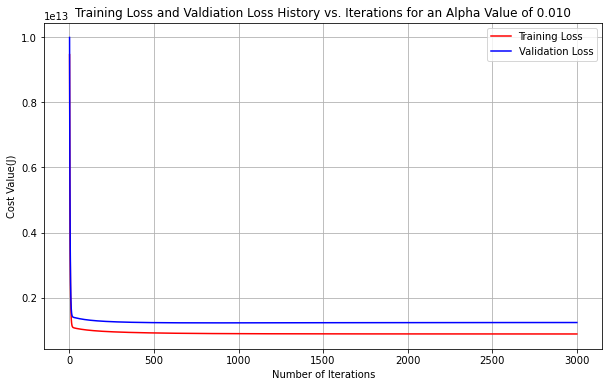

Final Training Loss Value : 884230392903.4537
Final Validation Loss Value:  1236027781066.8718



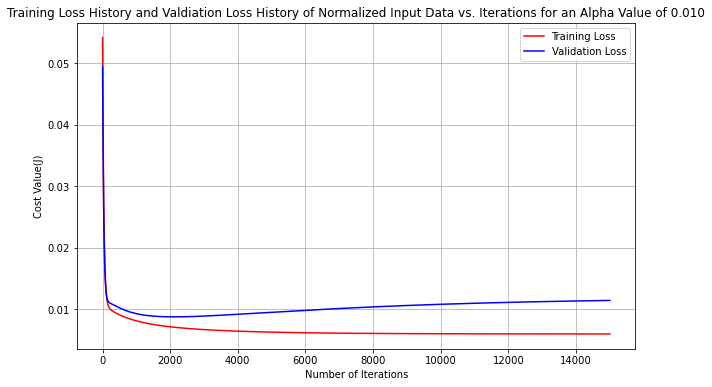

Final Training Loss Value : 0.005994421021531562
Final Validation Loss Value:  0.011448829069714072



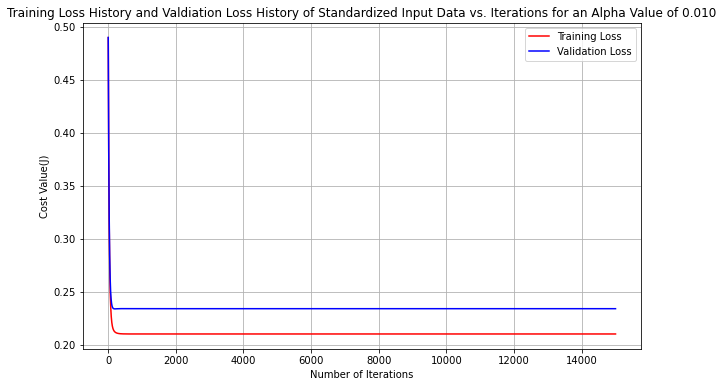

Final Training Loss Value : 0.21014537103023928
Final Validation Loss Value:  0.23400767295076771


In [25]:
epochs = gradient_descent_inputs_1a['epochs']
plt.plot(range(1, epochs+1), gradient_descent_inputs_1a['training_loss_history'], label="Training Loss", color='red')
plt.plot(range(1, epochs+1), gradient_descent_inputs_1a['validation_loss_history'], label="Validation Loss", color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Value(J)")
plt.legend()
plt.title("Training Loss and Valdiation Loss History vs. Iterations for an Alpha Value of {:.3f}".format(gradient_descent_inputs_1a['alpha']))
plt.show()
print("Final Training Loss Value :", gradient_descent_inputs_1a['training_loss_history'][-1])
print("Final Validation Loss Value: ", gradient_descent_inputs_1a['validation_loss_history'][-1])
print("")  # For Display Formatting
epochs = gradient_descent_norm_inputs_2a['epochs']
plt.plot(range(1,epochs+1), gradient_descent_norm_inputs_2a['training_loss_history'], label="Training Loss", color='red')
plt.plot(range(1,epochs+1), gradient_descent_norm_inputs_2a['validation_loss_history'], label="Validation Loss", color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Value(J)")
plt.legend()
plt.title("Training Loss History and Valdiation Loss History of Normalized Input Data vs. Iterations for an Alpha Value of {:.3f}".format(gradient_descent_norm_inputs_2a['alpha']))
plt.show()
print("Final Training Loss Value :", gradient_descent_norm_inputs_2a['training_loss_history'][-1])
print("Final Validation Loss Value: ", gradient_descent_norm_inputs_2a['validation_loss_history'][-1])
print("")  # For Display Formatting

epochs = gradient_descent_std_inputs_2a['epochs']
plt.plot(range(1, epochs+1), gradient_descent_std_inputs_2a['training_loss_history'], label="Training Loss", color='red')
plt.plot(range(1, epochs+1), gradient_descent_std_inputs_2a['validation_loss_history'], label="Validation Loss", color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Value(J)")
plt.legend()
plt.title("Training Loss History and Valdiation Loss History of Standardized Input Data vs. Iterations for an Alpha Value of {:.3f}".format(gradient_descent_std_inputs_2a['alpha']))
plt.show()
print("Final Training Loss Value :", gradient_descent_std_inputs_2a['training_loss_history'][-1])
print("Final Validation Loss Value: ", gradient_descent_std_inputs_2a['validation_loss_history'][-1])


The three figures above show the Training and Validation Loss Histories for the Input Data, Normalized Input Data, and Standardized Input Data respectively. 

<u>Comparison of Dataset Scaling and Non Dataset Scaling based Training:</u> It is concluded that the training accuracy of the linear regression model with the scaled input data is an order of magnitude better than the training accuracy of the linear regression model with no scaled input data. This is due to the fact that the scale of the "area" input values and the "price" output values are vastly different than the scales of the rest of the input explanatory values. These differences in scale between the explanatory variables makes it difficult to achieve convergence with a low training loss value (and validation loss value). It was observed that when the explanatory variables were scaled (via. normalization or standardization), a much lower validation loss value was achieved during convergence. For example, the "Training Loss History and Validation Loss History vs. Iterations" figure above indicates that the final loss value without scaled input data is  1236027781066.8718, whereas the subsequent two figures above indicate that the final training loss for normalized data and standardized data is 0.011448829069714072 and 0.23400767295076771 respectively. 


<u>Comparison Between Normalized Scaling and Standardized Scaling Training:</u> It was concluded that the training accuracy of the model with the normalized scaling approach was higher than the training accuracy of the standardized scaling approach. This is exemplified through the final valdiation loss values displayed by last two figures above. The final validation loss with normalized scaling (0.011448829069714072) was considerably lower than the final validation loss with standardized scaling(0.23400767295076771).Because the validation loss of the normalized scaled training is lower than the validation loss of the standardized scaled training, it was concluded that the training accuracy of normalized scaling model is higher than the training accuracy of the standardized scaling model.  


<u>Which input scaling achieves the best training: </u> As illustrated in the figure Training Loss History and Validation Loss History of Normalized Input Data vs. Iterations above, the valdiation loss slightly increased over iterations whereas the training loss slightly decreased over iterations. This phenomenon indicates that there may be a very slight case of overfitting in the training for the normalized input data. Very slight is used because the true difference between the final validation loss and the final training validation loss is small (approx. 0.00545 of difference). However, during training with the standardized input data, it was noticed that both the training loss and validation loss have an almost identical trend across iterations(indicating that overfitting is more under control) as shown in the final of the three figures above. However, because the final validation loss of the normalization scaled data is considerably lower than the final validation loss of the standardized scaled data, it was concluded that the normalized scaled data achieves the best training.

<b>Question 2b. </b>
Task: Repeat problem 1b with input normalization and input standardization. Recall that the input explanatory variables are:

 - area
 - bedrooms
 - bathrooms
 - stories
 - mainroad
 - guestroom
 - basement
 - hotwaterheating
 - airconditioning

The below sections are used to answer question 2b. 

The first step is to construct training and validation datasets with the input explanatory variables of interest.  Note that we have already split the input dataset into training and validation datasets in 2a. Therefore we can re-use these datasets as shown below.

In [26]:
# Select data that pertain to the input variables of interest.
vars_of_interest = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating','airconditioning', 'price']

# We are using the training and validation data spaces that were defined in question 2a.
df_training_2b = df_training[vars_of_interest] # Training Dataset for question 2b.
df_validation_2b = df_validation[vars_of_interest] # Validation Dataset for question 2b.



We shall now create training and validation sets that contain input standardization and input normalization respectively. 

In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')

vars_of_interest = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating','airconditioning','price']

# Define Min Max Scaler
min_max_scaler = MinMaxScaler()
df_training_2b_min_max_scaled = df_training_2b.copy()
df_validation_2b_min_max_scaled = df_validation_2b.copy()
df_training_2b_min_max_scaled[vars_of_interest] = min_max_scaler.fit_transform(df_training_2b_min_max_scaled[vars_of_interest])
df_validation_2b_min_max_scaled[vars_of_interest] = min_max_scaler.fit_transform(df_validation_2b_min_max_scaled[vars_of_interest])




# Define Standardized Scaler
standardized_scaler = StandardScaler()
df_training_2b_standardized = df_training_2b.copy()
df_validation_2b_standardized = df_validation_2b.copy()
df_training_2b_standardized[vars_of_interest] = standardized_scaler.fit_transform(df_training_2b_standardized[vars_of_interest])
df_validation_2b_standardized[vars_of_interest] = standardized_scaler.fit_transform(df_validation_2b_standardized[vars_of_interest])


print("Training Dataset Min Max Scaled: ")
print(df_training_2b_min_max_scaled.head())
print("") # For formatting
print("====================================================")
print("Training Dataset with Input Standardization: ")
print(df_training_2b_standardized.head())
print("") # For formatting
print("=====================================================")

Training Dataset Min Max Scaled: 
         area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
126  0.378694       0.4        0.0      0.0       1.0        0.0       1.0   
363  0.132921       0.2        0.0      0.0       1.0        0.0       0.0   
370  0.180756       0.2        0.0      0.0       1.0        0.0       0.0   
31   0.367698       0.4        0.0      1.0       1.0        0.0       0.0   
113  0.547766       0.4        0.0      0.0       1.0        0.0       1.0   

     hotwaterheating  airconditioning     price  
126              0.0              0.0  0.393333  
363              1.0              0.0  0.186667  
370              0.0              1.0  0.180000  
31               0.0              1.0  0.633333  
113              0.0              0.0  0.412667  

Training Dataset with Input Standardization: 
         area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
126  0.934301  0.055861  -0.553238 -0.907660  0.397561  -0.478573  1.33

The next step is to apply the gradient descent algorithm to both the input normalized and input standardized datasets in order to train the model. Recall that the linear model in the form of 
H(x) = $\theta_{0}$ + $\theta_{1}$*X1 + $\theta_{2}$*X2 + $\theta_{3}$*X3 + $\theta_{4}$*X4 + $\theta_{5}$*X5 + $\theta_{6}$*X6 + $\theta_{7}$*X7 + $\theta_{8}$*X8 + $\theta_{9}$*X9    

where :
- X1 Represents area
- X2 Represents bedrooms
- X3 Represents bathrooms
- X4 Represents stories
- X5 Represents mainroad
- X6 Represents guestroom
- X7 Represents basement
- X8 Represents hotwaterheating
- X9 Represents airconditioning


In [28]:
# Create x_training and y_training datasets for training of the model.
x0 = np.ones((M_training,1)) # Used for multiplication with Theta_0  in calculating the cost value and in the gradient descent algorithm.
x1 = df_training_2b_min_max_scaled.values[:, 0] # Explanatory Value X1 
x2 = df_training_2b_min_max_scaled.values[:, 1] # Explanatory Value X2
x3 = df_training_2b_min_max_scaled.values[:, 2] # Explanatory Value X3
x4 = df_training_2b_min_max_scaled.values[:, 3] # Explanatory Value X4
x5 = df_training_2b_min_max_scaled.values[:, 4] # Explanatory Value X5
x6 = df_training_2b_min_max_scaled.values[:, 5] # Explanatory Value X6
x7 = df_training_2b_min_max_scaled.values[:, 6] # Explanatory Value X7
x8 = df_training_2b_min_max_scaled.values[:, 7] # Explanatory Value X8
x9 = df_training_2b_min_max_scaled.values[:, 8] # Explanatory Value X9
x1 = x1.reshape(M_training,1)
x2 = x2.reshape(M_training,1)
x3 = x3.reshape(M_training,1)
x4 = x4.reshape(M_training,1)
x5 = x5.reshape(M_training,1)
x6 = x6.reshape(M_training,1)
x7 = x7.reshape(M_training,1)
x8 = x8.reshape(M_training,1)
x9 = x9.reshape(M_training,1)
x_training_min_max_scaled = np.hstack((x0, x1, x2, x3, x4, x5,x6, x7, x8, x9))
y_training_min_max_scaled = df_training_2b_min_max_scaled.values[:,9]

#Create x_validation and y_validation training datasets for validation of the model.
x0 = np.ones((M_validation,1)) # Used for multiplication with Theta_0  in calculating the cost value and in the gradient descent algorithm.
x1 = df_validation_2b_min_max_scaled.values[:, 0] # Explanatory Value X1 
x2 = df_validation_2b_min_max_scaled.values[:, 1] # Explanatory Value X2
x3 = df_validation_2b_min_max_scaled.values[:, 2] # Explanatory Value X3
x4 = df_validation_2b_min_max_scaled.values[:, 3] # Explanatory Value X4
x5 = df_validation_2b_min_max_scaled.values[:, 4] # Explanatory Value X5
x6 = df_validation_2b_min_max_scaled.values[:, 5] # Explanatory Value X6
x7 = df_validation_2b_min_max_scaled.values[:, 6] # Explanatory Value X7
x8 = df_validation_2b_min_max_scaled.values[:, 7] # Explanatory Value X8
x9 = df_validation_2b_min_max_scaled.values[:, 8] # Explanatory Value X9
x1 = x1.reshape(M_validation,1)
x2 = x2.reshape(M_validation,1)
x3 = x3.reshape(M_validation,1)
x4 = x4.reshape(M_validation,1)
x5 = x5.reshape(M_validation,1)
x6 = x6.reshape(M_validation,1)
x7 = x7.reshape(M_validation,1)
x8 = x8.reshape(M_validation,1)
x9 = x9.reshape(M_validation,1)
x_validation_min_max_scaled = np.hstack((x0, x1, x2, x3, x4, x5, x6, x7, x8, x9))
y_validation_min_max_scaled = df_validation_2b_min_max_scaled.values[:,9]







Next we select the best alpha value for the input normalized dataset. Note that the gradient_descent_algorithm and calc_loss functions have already been defined in 2a. Therefore we will re-use this function for 2b.

In [29]:
alpha_values = np.linspace(0.01, 0.10, 10) # Specifiy 10 alpha values from 0.01 to 0.10.
epochs = 15000
for alpha in alpha_values:
    # Define inital theta values.
    theta_values = np.zeros(10) # represents [theta0, theta1, theta2, theta3, theta4, theta5, theta6, theta7, theta8, theta9, theta10]
    theta_values, training_loss_history_min_max_scale, validation_loss_history_min_max_scale = gradient_descent_algorithm(x_training_min_max_scaled, 
                                                                                                                          y_training_min_max_scaled,
                                                                                                                          x_validation_min_max_scaled,
                                                                                                                          y_validation_min_max_scaled,
                                                                                                                          theta_values,alpha, epochs)

    print("=========================================")
    print("For an Alpha of {:.3f}".format(alpha))
    print("Final Training Cost: {:.3f}".format(training_loss_history_min_max_scale[-1]))
    print("Final Validation Cost: {:.3f}".format(validation_loss_history_min_max_scale[-1]))


For an Alpha of 0.010
Final Training Cost: 0.005
Final Validation Cost: 0.009
For an Alpha of 0.020
Final Training Cost: 0.005
Final Validation Cost: 0.010
For an Alpha of 0.030
Final Training Cost: 0.005
Final Validation Cost: 0.010
For an Alpha of 0.040
Final Training Cost: 0.005
Final Validation Cost: 0.010
For an Alpha of 0.050
Final Training Cost: 0.005
Final Validation Cost: 0.010
For an Alpha of 0.060
Final Training Cost: 0.005
Final Validation Cost: 0.010
For an Alpha of 0.070
Final Training Cost: 0.005
Final Validation Cost: 0.010
For an Alpha of 0.080
Final Training Cost: 0.005
Final Validation Cost: 0.010
For an Alpha of 0.090
Final Training Cost: 0.005
Final Validation Cost: 0.010
For an Alpha of 0.100
Final Training Cost: 0.005
Final Validation Cost: 0.010


Based on the final validation costs printed in the code block immediately above, the alpha value of 0.01 provides the lowest validation costs. Therefore, 0.01 will be used as the alpha to train the model with gradient descent. The code block immediately below is used to train a linear model using gradient descent with normalized input data. At the end of the code block, the final linear model is printed along with its theta values.

In [30]:
theta_values = np.zeros(10) # represents [theta0, theta1, theta2, theta3, theta4, theta5, theta6, theta7, theta8, theta9, theta10]
alpha = 0.01
epochs = 15000




theta_values, training_loss_history, validation_loss_history = gradient_descent_algorithm(x_training_min_max_scaled, 
                                                                            y_training_min_max_scaled,
                                                                            x_validation_min_max_scaled,
                                                                            y_validation_min_max_scaled,
                                                                            theta_values,
                                                                            alpha, 
                                                                            epochs)


gradient_descent_norm_inputs_2b = {} # Gradient Descent Output Metrics for Standardized Input Variables in Problem 2a.
gradient_descent_norm_inputs_2b['theta_values'] = theta_values
gradient_descent_norm_inputs_2b['training_loss_history'] = training_loss_history
gradient_descent_norm_inputs_2b['validation_loss_history'] = validation_loss_history
gradient_descent_norm_inputs_2b['epochs'] = epochs
gradient_descent_norm_inputs_2b['alpha'] = alpha

linear_regression_model_str = "H(x) = "
for indx,theta in enumerate(gradient_descent_norm_inputs_2b['theta_values']):
    print("Theta_{} Value: {:.5f}".format(indx, theta))
    if indx == 0:
        linear_regression_model_str += "{:.5f}".format(theta)
    else:
        linear_regression_model_str += " + {:.5f}*X{}".format(theta, indx)
print("==============================================")
print("Final Linear Regression Model") # Print String representation of linear regression model.
print(linear_regression_model_str)
print("===============================================")

    


Theta_0 Value: -0.00454
Theta_1 Value: 0.39742
Theta_2 Value: 0.07787
Theta_3 Value: 0.31445
Theta_4 Value: 0.11425
Theta_5 Value: 0.06374
Theta_6 Value: 0.03025
Theta_7 Value: 0.05652
Theta_8 Value: 0.07186
Theta_9 Value: 0.07511
Final Linear Regression Model
H(x) = -0.00454 + 0.39742*X1 + 0.07787*X2 + 0.31445*X3 + 0.11425*X4 + 0.06374*X5 + 0.03025*X6 + 0.05652*X7 + 0.07186*X8 + 0.07511*X9


The next step is to select the best alpha value for training the input standardized dataset. 

In [31]:
# Create x_training and y_training datasets for training of the model.
x0 = np.ones((M_training,1)) # Used for multiplication with Theta_0  in calculating the cost value and in the gradient descent algorithm.
x1 = df_training_2b_standardized.values[:, 0] # Explanatory Value X1 
x2 = df_training_2b_standardized.values[:, 1] # Explanatory Value X2
x3 = df_training_2b_standardized.values[:, 2] # Explanatory Value X3
x4 = df_training_2b_standardized.values[:, 3] # Explanatory Value X4
x5 = df_training_2b_standardized.values[:, 4] # Explanatory Value X5
x6 = df_training_2b_standardized.values[:, 5] # Explanatory Value X6
x7 = df_training_2b_standardized.values[:, 6] # Explanatory Value X7
x8 = df_training_2b_standardized.values[:, 7] # Explanatory Value X8
x9 = df_training_2b_standardized.values[:, 8] # Explanatory Value X9
x1 = x1.reshape(M_training,1)
x2 = x2.reshape(M_training,1)
x3 = x3.reshape(M_training,1)
x4 = x4.reshape(M_training,1)
x5 = x5.reshape(M_training,1)
x6 = x6.reshape(M_training,1)
x7 = x7.reshape(M_training,1)
x8 = x8.reshape(M_training,1)
x9 = x9.reshape(M_training,1)
x_training = np.hstack((x0, x1, x2, x3, x4, x5,x6, x7, x8, x9))
y_training = df_training_2b_standardized.values[:,9]

#Create x_validation and y_validation training datasets for validation of the model.
x0 = np.ones((M_validation,1)) # Used for multiplication with Theta_0  in calculating the cost value and in the gradient descent algorithm.
x1 = df_validation_2b_standardized.values[:, 0] # Explanatory Value X1 
x2 = df_validation_2b_standardized.values[:, 1] # Explanatory Value X2
x3 = df_validation_2b_standardized.values[:, 2] # Explanatory Value X3
x4 = df_validation_2b_standardized.values[:, 3] # Explanatory Value X4
x5 = df_validation_2b_standardized.values[:, 4] # Explanatory Value X5
x6 = df_validation_2b_standardized.values[:, 5] # Explanatory Value X6
x7 = df_validation_2b_standardized.values[:, 6] # Explanatory Value X7
x8 = df_validation_2b_standardized.values[:, 7] # Explanatory Value X8
x9 = df_validation_2b_standardized.values[:, 8] # Explanatory Value X9
x1 = x1.reshape(M_validation,1)
x2 = x2.reshape(M_validation,1)
x3 = x3.reshape(M_validation,1)
x4 = x4.reshape(M_validation,1)
x5 = x5.reshape(M_validation,1)
x6 = x6.reshape(M_validation,1)
x7 = x7.reshape(M_validation,1)
x8 = x8.reshape(M_validation,1)
x9 = x9.reshape(M_validation,1)
x_validation  = np.hstack((x0, x1, x2, x3, x4, x5, x6, x7, x8, x9))
y_validation = df_validation_2b_standardized.values[:,9]







In [32]:
alpha_values = np.linspace(0.01, 0.10, 10) # Specifiy 10 alpha values from 0.01 to 0.10.
epochs = 15000
for alpha in alpha_values:
    # Define inital theta values.
    theta_values = np.zeros(10) # represents [theta0, theta1, theta2, theta3, theta4, theta5, theta6, theta7, theta8, theta9, theta10]
    theta_values, training_loss_history_min_max_scale, validation_loss_history_min_max_scale = gradient_descent_algorithm(x_training, 
                                                                                                                          y_training,
                                                                                                                          x_validation,
                                                                                                                          y_validation,
                                                                                                                          theta_values,
                                                                                                                          alpha,
                                                                                                                          epochs)

    print("=========================================")
    print("For an Alpha of {:.3f}".format(alpha))
    print("Final Training Cost: {:.3f}".format(training_loss_history_min_max_scale[-1]))
    print("Final Validation Cost: {:.3f}".format(validation_loss_history_min_max_scale[-1]))

print("") # For display formatting
    

For an Alpha of 0.010
Final Training Cost: 0.174
Final Validation Cost: 0.193
For an Alpha of 0.020
Final Training Cost: 0.174
Final Validation Cost: 0.193
For an Alpha of 0.030
Final Training Cost: 0.174
Final Validation Cost: 0.193
For an Alpha of 0.040
Final Training Cost: 0.174
Final Validation Cost: 0.193
For an Alpha of 0.050
Final Training Cost: 0.174
Final Validation Cost: 0.193
For an Alpha of 0.060
Final Training Cost: 0.174
Final Validation Cost: 0.193
For an Alpha of 0.070
Final Training Cost: 0.174
Final Validation Cost: 0.193
For an Alpha of 0.080
Final Training Cost: 0.174
Final Validation Cost: 0.193
For an Alpha of 0.090
Final Training Cost: 0.174
Final Validation Cost: 0.193
For an Alpha of 0.100
Final Training Cost: 0.174
Final Validation Cost: 0.193



As displayed above, the validation loss did not change after training at various alpha values. Therefore, 0.01 will be used as the alpha to train the model with gradient descent. The code block immediately below is used to train a linear model using gradient descent with normalized input data. At the end of the code block, the final linear model is printed along with its theta values.

In [33]:
theta_values = np.zeros(10) # represents [theta0, theta1, theta2, theta3, theta4, theta5, theta6, theta7, theta8, theta9, theta10]
alpha = 0.01
epochs = 15000




theta_values, training_loss_history, validation_loss_history = gradient_descent_algorithm(x_training, 
                                                                                          y_training,
                                                                                          x_validation,
                                                                                          y_validation,
                                                                                          theta_values,
                                                                                          alpha, 
                                                                                          epochs)


gradient_descent_std_inputs_2b = {} # Gradient Descent Output Metrics for Standardized Input Variables in Problem 2a.
gradient_descent_std_inputs_2b['theta_values'] = theta_values
gradient_descent_std_inputs_2b['training_loss_history'] = training_loss_history
gradient_descent_std_inputs_2b['validation_loss_history'] = validation_loss_history
gradient_descent_std_inputs_2b['epochs'] = epochs
gradient_descent_std_inputs_2b['alpha'] = alpha

linear_regression_model_str = "H(x) = "
for indx,theta in enumerate(gradient_descent_std_inputs_2b['theta_values']):
    print("Theta_{} Value: {:.5f}".format(indx, theta))
    if indx == 0:
        linear_regression_model_str += "{:.5f}".format(theta)
    else:
        linear_regression_model_str += " + {:.5f}*X{}".format(theta, indx)
print("==============================================")
print("Final Linear Regression Model") # Print String representation of linear regression model.
print(linear_regression_model_str)
print("===============================================")

    

Theta_0 Value: 0.00000
Theta_1 Value: 0.37105
Theta_2 Value: 0.05516
Theta_3 Value: 0.30198
Theta_4 Value: 0.19959
Theta_5 Value: 0.12255
Theta_6 Value: 0.06639
Theta_7 Value: 0.16369
Theta_8 Value: 0.09359
Theta_9 Value: 0.20311
Final Linear Regression Model
H(x) = 0.00000 + 0.37105*X1 + 0.05516*X2 + 0.30198*X3 + 0.19959*X4 + 0.12255*X5 + 0.06639*X6 + 0.16369*X7 + 0.09359*X8 + 0.20311*X9


<b>Answer to Question 2b </b>

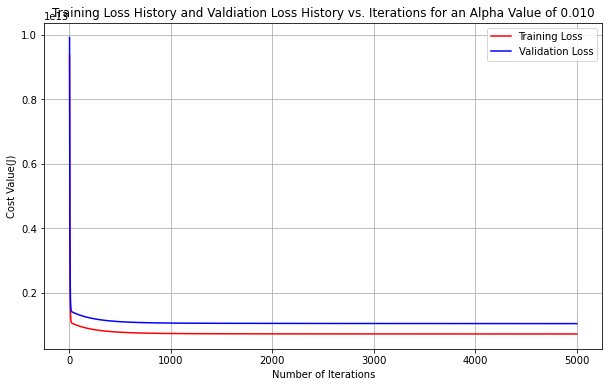

Final Training Loss Value : 723476311533.3629
Final Validation Loss Value:  1044229719736.3013



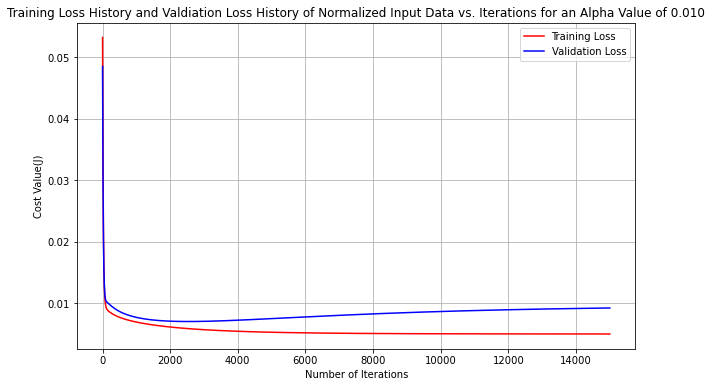

Final Training Loss Value : 0.0049592331208311
Final Validation Loss Value:  0.00919124004806916



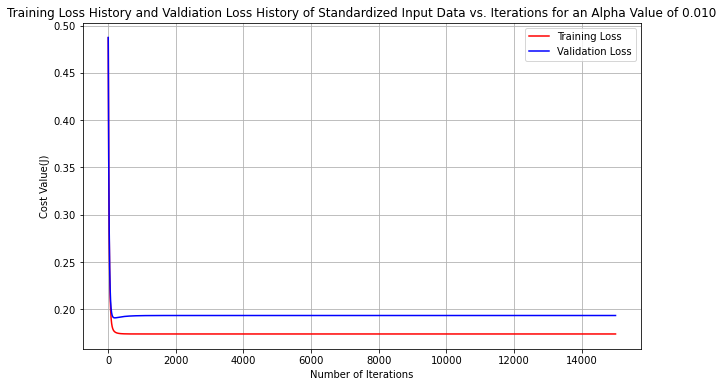

Final Training Loss Value : 0.1738144523355143
Final Validation Loss Value:  0.19335690168640604


In [34]:
epochs = gradient_descent_inputs_1b['epochs']
plt.plot(range(1, epochs+1), gradient_descent_inputs_1b['training_loss_history'], label="Training Loss", color='red')
plt.plot(range(1, epochs+1), gradient_descent_inputs_1b['validation_loss_history'], label="Validation Loss", color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Value(J)")
plt.legend()
plt.title("Training Loss History and Valdiation Loss History vs. Iterations for an Alpha Value of {:.3f}".format(gradient_descent_inputs_1b['alpha']))
plt.show()
print("Final Training Loss Value :", gradient_descent_inputs_1b['training_loss_history'][-1])
print("Final Validation Loss Value: ", gradient_descent_inputs_1b['validation_loss_history'][-1])
print("")  # For Display Formatting

epochs = gradient_descent_norm_inputs_2b['epochs']
plt.plot(range(1,epochs+1), gradient_descent_norm_inputs_2b['training_loss_history'], label="Training Loss", color='red')
plt.plot(range(1,epochs+1), gradient_descent_norm_inputs_2b['validation_loss_history'], label="Validation Loss", color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Value(J)")
plt.legend()
plt.title("Training Loss History and Valdiation Loss History of Normalized Input Data vs. Iterations for an Alpha Value of {:.3f}".format(gradient_descent_norm_inputs_2b['alpha']))
plt.show()
print("Final Training Loss Value :", gradient_descent_norm_inputs_2b['training_loss_history'][-1])
print("Final Validation Loss Value: ", gradient_descent_norm_inputs_2b['validation_loss_history'][-1])
print("")  # For Display Formatting

epochs = gradient_descent_std_inputs_2b['epochs']
plt.plot(range(1, epochs+1), gradient_descent_std_inputs_2b['training_loss_history'], label="Training Loss", color='red')
plt.plot(range(1, epochs+1), gradient_descent_std_inputs_2b['validation_loss_history'], label="Validation Loss", color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Value(J)")
plt.legend()
plt.title("Training Loss History and Valdiation Loss History of Standardized Input Data vs. Iterations for an Alpha Value of {:.3f}".format(gradient_descent_std_inputs_2b['alpha']))
plt.show()
print("Final Training Loss Value :", gradient_descent_std_inputs_2b['training_loss_history'][-1])
print("Final Validation Loss Value: ", gradient_descent_std_inputs_2b['validation_loss_history'][-1])


The three figures above show the Training and Validation Loss Histories for the Input Data, Normalized Input Data, and Standardized Input Data respectively. 

<u>Comparison of Dataset Scaling and Non Dataset Scaling based Training:</u> It is concluded that the training accuracy of the linear regression model with the scaled input data is an order of magnitude better than the training accuracy of the linear regression model with no scaled input data(similar to the observation made in 2a). This is due to the fact that the scale of the "area" input values and the "price" output values are vastly different than the scales of the rest of the input explanatory values. These differences in scale between the explanatory variables makes it difficult to achieve convergence with a low training loss value (and validation loss value). It was observed that when the explanatory variables were scaled (via. normalization or standardization), a much lower validation loss value was achieved during convergence. For example, the "Training Loss History and Validation Loss History vs. Iterations" figure above indicates that the final validation loss value without scaled input data is  1044229719736.3013, whereas the subsequent two figures above indicate that the final training loss for normalized data and standardized data is 0.00919124004806916 and 0.19335690168640604 respectively. 


<u>Comparison Between Normalized Scaling and Standardized Scaling Training:</u> It was concluded that the training accuracy of the model with the normalized scaling approach is higher than the training accuracy of the standardized scaling approach. This is exemplified through the final valdiation loss values displayed by last two figures in the code block above. The final validation loss with normalized scaling (0.00919124004806916) was considerably lower than the final validation loss with standardized scaling(0.19335690168640604). Because the validation loss of the normalized scaled training is lower than the validation loss of the standardized scaled training, it was concluded that the training accuracy of normalized scaling model is higher than the training accuracy of the standardized scaling model.  


<u>Which input scaling achieves the best training: </u> As illustrated in the figure Training Loss History and Validation Loss History of Normalized Input Data vs. Iterations above, the valdiation loss slightly increased over iterations whereas the training loss slightly decreased over iterations. This phenomenon indicates that there may be a very slight case of overfitting in the training for the normalized input data. Very slight is used because the true difference between the final validation loss and the final training validation loss is small (approx. 0.0042 of difference). However, during training with the standardized input data, it was noticed that both the training loss and validation loss have an almost identical trend across iterations(indicating that overfitting is more under control) as shown in the final of the three figures above. However, because the final validation loss of the normalization scaled data is considerably lower than the final validation loss of the standardized scaled data, it was concluded that the normalized scaled data achieves the best training.

The resulting sections will cover explanations, code, and plots pertaining to PROBLEM 3 of the homework. 
===========================================================================================================================
<b>3a</b>: The task is to develop a gradient descent training and evaluation code that predicts housing price based on the following input variables with a regularization term.
 - area
 - bedrooms
 - bathrooms
 - stories
 - parking
 
 Recall that the linear regression model will be in the form of H(x) = $\theta_{0}$ + $\theta_{1}$*X1 + $\theta_{2}$*X2 + $\theta_{3}$*X3 + $\theta_{4}$*X4 + $\theta_{5}$*X5

where :
- X1 Represents area
- X2 Represents bedrooms
- X3 Represents bathrooms
- X4 Represents stories
- X5 Represents parking
 

The first step is to modify the gradient descent algorithm function so that we may add a regularization penalty in the training. As illustrated in the code block below, the gradient descent equation is transformed into  $\theta_{j}$ := $\theta_{j}$(1 - $\alpha$) - $\alpha$*(1/m) * $\sum_{i=1}^{m} h_{\theta}(x^{(i)}) - y^{(i)})X_{j}^{i}$

In [35]:
def gradient_descent_algorithm(x_training_set,y_training_set, x_validation_set, y_validation_set,theta,learning_rate, epochs, penalty_value=None):
    """
    Compute the loss for linear regression using the gradient descent approach. 
    
    Input Parameters
    ---------------------------------------
    x_training_set: 2D array where each row represents a training point and each column represent a training feature(i.e. X1, X2, X3). This is used for training/fitting the linear model.
    y_training_set: 1D array of training labels/target values. Each row represents a label for a training point/epoch.This is used for training/fitting the linear model.
    x_valdiation_set: 2D array where each row represents a training point and each column represent a training feature(i.e. X1, X2, X3). This is used for validating the linear model.
    y_validation_set: 1D array of training labels/target values. Each row represents a label for a training point/epoch.This is used for validating the linear model.
    theta: 1D array of weights. (1xn)
    learning_rate : Scalar value that represents the alpha scale in the gradient descent formula.
    epochs: Scalar value that represents the number of iterations used in the gradient descent algorithm.
    penalty_value: scalar value that represents the penalty weight, lambda in the regularization term of the gradient descent algorithm.If penalty_value is None, no regularization term will be applied 
    in the gradient descent algorithm.
    
    Output Parameters
    ----------------------------------------
    theta : 1D Array of fitting parameters/weights. Dimension (1xn)
    training_loss_history : 1D array that contains cost value for each iteration/epoch. Dimension(Mx1) where M = Number of Training data points. This represents the loss of the model during training.
    validation_loss_history : 1D array that contains cost value for each iteration/epoch. Dimension(Mx1) where M = Number of Training data points. This represents the loss of the model during validation.
    """
    training_loss_history = np.zeros(epochs)# Create a 1D array that will hold the loss history of the model being fitted to the training dataset throughout the gradient descent algorithm. 
    validation_loss_history = np.zeros(epochs) # Create a 1D array that will hold the loss history as the model is being evaluated through the validation dataset.
    M_training = len(y_training_set)
    for i in range(0,epochs):     
        h_0 = x_training_set.dot(theta) # obtain the predictions of the model. Also referred to as H(x)
        errors = np.subtract(h_0, y_training_set)  # subtract the predictions from the labels/expected values. 
        summation_errors = (learning_rate/M_training) * x_training_set.transpose().dot(errors) # Sum all of the errors and then multiply  by alpha/M
        
        if penalty_value is None:
            theta  = theta - summation_errors # Update the current theta values.
        else:
            penalty_term = (1 - learning_rate *(penalty_value/M_training)) # Construct penalty term.
            theta[1:] = penalty_term * theta[1:] # Only apply penalty term to theta_1 to theta_n. We must not add a penalty term to theta_0.
            theta = theta - summation_errors # Update the current theta values by subtracting summation_errors. 
            
        training_loss_history[i] = calc_loss(x_training_set,y_training_set,theta) #Add to the training_loss_history tracker.
        validation_loss_history[i] = calc_loss(x_validation_set, y_validation_set, theta) # Add to the validation_loss_history tracker.
        
    return theta, training_loss_history, validation_loss_history
    
    

Note that the calc_loss function is not changed. Therefore we can re-use the calc_loss function defined in problem 2 of this report. 
Since it was determined in 2a that the best input scaling approach was normalization, we shall use the normalization scaled training and validation sets from 2a. We shall also use the same learning rate(0.01) and epoch count(15000) used in 2a as well.

In [36]:
# Create x_training and y_training datasets for training of the model.
x0 = np.ones((M_training,1)) # Used for multiplication with Theta_0  in calculating the cost value and in the gradient descent algorithm.
x1 = df_training_2a_min_max_scaled.values[:, 0] # Explanatory Value X1 
x2 = df_training_2a_min_max_scaled.values[:, 1] # Explanatory Value X2
x3 = df_training_2a_min_max_scaled.values[:, 2] # Explanatory Value X3
x4 = df_training_2a_min_max_scaled.values[:, 3] # Explanatory Value X4
x5 = df_training_2a_min_max_scaled.values[:, 4] # Explanatory Value X5
x1 = x1.reshape(M_training,1)
x2 = x2.reshape(M_training,1)
x3 = x3.reshape(M_training,1)
x4 = x4.reshape(M_training,1)
x5 = x5.reshape(M_training,1)
x_training_min_max_scaled = np.hstack((x0, x1, x2, x3, x4, x5))
y_training_min_max_scaled = df_training_2a_min_max_scaled.values[:, 5] # Price Values

#Create x_validation and y_validation training datasets for validation of the model.
x0 = np.ones((M_validation,1)) # Used for multiplication with Theta_0  in calculating the cost value and in the gradient descent algorithm.
x1 = df_validation_2a_min_max_scaled.values[:, 0] # Explanatory Value X1 
x2 = df_validation_2a_min_max_scaled.values[:, 1] # Explanatory Value X2
x3 = df_validation_2a_min_max_scaled.values[:, 2] # Explanatory Value X3
x4 = df_validation_2a_min_max_scaled.values[:, 3] # Explanatory Value X4
x5 = df_validation_2a_min_max_scaled.values[:, 4] # Explanatory Value X5
x1 = x1.reshape(M_validation,1)
x2 = x2.reshape(M_validation,1)
x3 = x3.reshape(M_validation,1)
x4 = x4.reshape(M_validation,1)
x5 = x5.reshape(M_validation,1)
x_validation_min_max_scaled = np.hstack((x0, x1, x2, x3, x4, x5))
y_validation_min_max_scaled = df_validation_2a_min_max_scaled.values[:,5] # Price Values


Note that we would like to explore various training penalties and their respective effects on training and validation losses. Therefore the code block below will perform training with multiple training penalties.

In [37]:
penalties = [0, 5, 10,15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
theta_values = np.zeros(6) # represents [theta0, theta1, theta2, theta3, theta4, theta5]
alpha = 0.01
epochs = 15000

for penalty_val in penalties:
    theta_values, training_loss_history, validation_loss_history = gradient_descent_algorithm(x_training_min_max_scaled, 
                                                                                            y_training_min_max_scaled,
                                                                                            x_validation_min_max_scaled,                           
                                                                                            y_validation_min_max_scaled,
                                                                                            theta_values,
                                                                                            alpha,
                                                                                            epochs,
                                                                                            penalty_value=penalty_val)




    print("Penalty Value : {}".format(penalty_val))
    print("Final Training Loss: {:.6f}".format(training_loss_history[-1]))
    print("Final Validation Loss: {:.6f}".format(validation_loss_history[-1]))
    print("================================================================")




Penalty Value : 0
Final Training Loss: 0.005994
Final Validation Loss: 0.011449
Penalty Value : 5
Final Training Loss: 0.006439
Final Validation Loss: 0.009274
Penalty Value : 10
Final Training Loss: 0.007034
Final Validation Loss: 0.008905
Penalty Value : 15
Final Training Loss: 0.007557
Final Validation Loss: 0.009029
Penalty Value : 20
Final Training Loss: 0.008011
Final Validation Loss: 0.009296
Penalty Value : 25
Final Training Loss: 0.008407
Final Validation Loss: 0.009604
Penalty Value : 30
Final Training Loss: 0.008756
Final Validation Loss: 0.009916
Penalty Value : 35
Final Training Loss: 0.009067
Final Validation Loss: 0.010217
Penalty Value : 40
Final Training Loss: 0.009344
Final Validation Loss: 0.010501
Penalty Value : 45
Final Training Loss: 0.009594
Final Validation Loss: 0.010766
Penalty Value : 50
Final Training Loss: 0.009819
Final Validation Loss: 0.011013
Penalty Value : 55
Final Training Loss: 0.010024
Final Validation Loss: 0.011242
Penalty Value : 60
Final Train

Based on the printout of final validation losses in the code block immediately above, the penalty value(lamda value) of 10 was observed to provide the lowest loss. Therefore, we shall use a lambda value of 10 in our training for question 3a. The code block immediately below produces the final theta values for the linear regression model for question 3a.

In [38]:
theta_values = np.zeros(6) # represents [theta0, theta1, theta2, theta3, theta4, theta5]
alpha = 0.01
epochs = 15000
penalty_val = 10 # Lambda of 10.
theta_values, training_loss_history, validation_loss_history = gradient_descent_algorithm(x_training_min_max_scaled, 
                                                                                          y_training_min_max_scaled,
                                                                                          x_validation_min_max_scaled,                           
                                                                                          y_validation_min_max_scaled,
                                                                                          theta_values,
                                                                                          alpha,
                                                                                          epochs,
                                                                                          penalty_value=penalty_val)

gradient_descent_norm_inputs_3a = {} # Gradient Descent Output Metrics for Normalized Input Variables in Problem 2a.
gradient_descent_norm_inputs_3a['theta_values'] = theta_values
gradient_descent_norm_inputs_3a['training_loss_history'] = training_loss_history
gradient_descent_norm_inputs_3a['validation_loss_history'] = validation_loss_history
gradient_descent_norm_inputs_3a['epochs'] = epochs
gradient_descent_norm_inputs_3a['alpha'] = alpha
gradient_descent_norm_inputs_3a['penalty'] = penalty_val


linear_regression_model_str = "H(x) = "
for indx,theta in enumerate(gradient_descent_norm_inputs_3a['theta_values']):
    print("Theta_{} Value: {:.5f}".format(indx, theta))
    if indx == 0:
        linear_regression_model_str += "{:.5f}".format(theta)
    else:
        linear_regression_model_str += " + {:.5f}*X{}".format(theta, indx)
print("==============================================")
print("Final Linear Regression Model") # Print String representation of linear regression model.
print(linear_regression_model_str)
print("===============================================")



Theta_0 Value: 0.12385
Theta_1 Value: 0.22090
Theta_2 Value: 0.08348
Theta_3 Value: 0.18633
Theta_4 Value: 0.12893
Theta_5 Value: 0.12386
Final Linear Regression Model
H(x) = 0.12385 + 0.22090*X1 + 0.08348*X2 + 0.18633*X3 + 0.12893*X4 + 0.12386*X5


<b>Answer to Question 3a </b> The below code block plots the results of 3a.

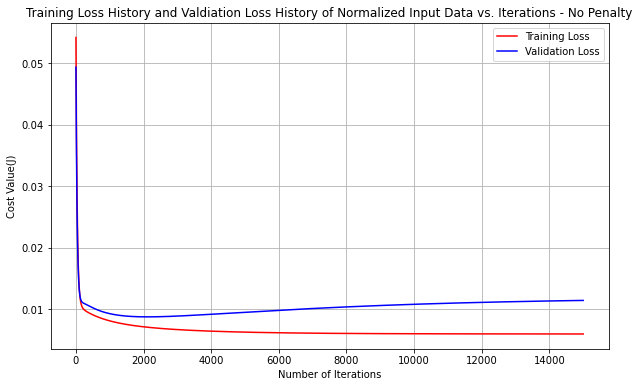

Final Training Loss Value : 0.005994421021531562
Final Validation Loss Value:  0.011448829069714072



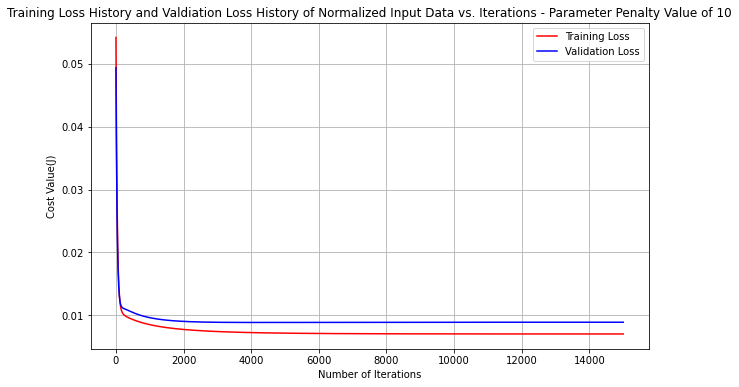

Final Training Loss Value : 0.00703561022059901
Final Validation Loss Value:  0.008904051081242426


In [39]:
epochs = gradient_descent_norm_inputs_2a['epochs']
plt.plot(range(1,epochs+1), gradient_descent_norm_inputs_2a['training_loss_history'], label="Training Loss", color='red')
plt.plot(range(1,epochs+1), gradient_descent_norm_inputs_2a['validation_loss_history'], label="Validation Loss", color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Value(J)")
plt.legend()
plt.title("Training Loss History and Valdiation Loss History of Normalized Input Data vs. Iterations - No Penalty")
plt.show()
print("Final Training Loss Value :", gradient_descent_norm_inputs_2a['training_loss_history'][-1])
print("Final Validation Loss Value: ", gradient_descent_norm_inputs_2a['validation_loss_history'][-1])
print("")  # For Display Formatting

epochs = gradient_descent_norm_inputs_3a['epochs']
plt.plot(range(1, epochs+1), gradient_descent_norm_inputs_3a['training_loss_history'], label="Training Loss", color='red')
plt.plot(range(1, epochs+1), gradient_descent_norm_inputs_3a['validation_loss_history'], label="Validation Loss", color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Value(J)")
plt.legend()
plt.title("Training Loss History and Valdiation Loss History of Normalized Input Data vs. Iterations - Parameter Penalty Value of {}".format(gradient_descent_norm_inputs_3a['penalty']))
plt.show()
print("Final Training Loss Value :", gradient_descent_norm_inputs_3a['training_loss_history'][-1])
print("Final Validation Loss Value: ", gradient_descent_norm_inputs_3a['validation_loss_history'][-1])


In the code block immediately above, the first figure shows the training and validation loss trends with no parameters penalty applied. The second figure above shows the training and validation loss trends with a parameters penalty applied with a lamda of 10. As previously mentioned in the answer to question 2a, the training loss trend tends to decrease over iterations, whereas the validation loss trend tends to increase over iterations (until convergence). This phenonmenon is an indicator that there is slight overfitting of the linear regression model during training.  

As illustrated in the second figure in the code block immediately above, it is observed that the validation loss trend decreases over iterations in a very similar fashion to the associated training loss trend. Essentially, both the validation loss and the training loss decrease over iterations in tandem. It was also observed in these results that the final validation loss(0.00890405) during training with a parameters penalty is now lower than the final validation loss(0.011448829) during training with no parameters penalty. However, it is also observed that the final training loss (0.0070356) for training with a parameters penalty is larger than the final training loss (0.0059944)for training without a parameters penalty. These three observations provide indication that the parameters penalty added in the training improved the generalization capability of the linear regression model. It was also observed that as one add a parameters penalty during training, there is a slight increase in training loss. This is considered a tradeoff with the parameters penalty.

<b>Question 3b. </b>
Task: Repeat problem 2b with a parameters penalty (regularization) in the gradient descent algorithm. Recall that the linear regression model is 

 - area
 - bedrooms
 - bathrooms
 - stories
 - mainroad
 - guestroom
 - basement
 - hotwaterheating
 - airconditioning
 
 Recall that the linear regression model shall be in the form of H(x) = $\theta_{0}$ + $\theta_{1}$*X1 + $\theta_{2}$*X2 + $\theta_{3}$*X3 + $\theta_{4}$*X4 + $\theta_{5}$*X5 + $\theta_{6}$*X6 + $\theta_{7}$*X7 + $\theta_{8}$*X8 + $\theta_{9}$*X9    

where :
- X1 Represents area
- X2 Represents bedrooms
- X3 Represents bathrooms
- X4 Represents stories
- X5 Represents mainroad
- X6 Represents guestroom
- X7 Represents basement
- X8 Represents hotwaterheating
- X9 Represents airconditioning


The below sections are used to answer question 3b. 

Because the gradient_descent_algorithm function has already been modified in 3a to accept a parameters penalty value(for regularization). The next step is to determine which parameter penalty value provides the best validation loss during training of the linear regression model.



Note that we will re-use the training and validation data sets constructed in problem 2b.
Recall that the best input scaling approach in 2b was determined to be normalization scaling. 
Also note that we will use the same training rate(alpha) and number of epochs  used in problem 2b.

In [40]:
# Create x_training and y_training datasets for training of the model.
x0 = np.ones((M_training,1)) # Used for multiplication with Theta_0  in calculating the cost value and in the gradient descent algorithm.
x1 = df_training_2b_min_max_scaled.values[:, 0] # Explanatory Value X1 
x2 = df_training_2b_min_max_scaled.values[:, 1] # Explanatory Value X2
x3 = df_training_2b_min_max_scaled.values[:, 2] # Explanatory Value X3
x4 = df_training_2b_min_max_scaled.values[:, 3] # Explanatory Value X4
x5 = df_training_2b_min_max_scaled.values[:, 4] # Explanatory Value X5
x6 = df_training_2b_min_max_scaled.values[:, 5] # Explanatory Value X6
x7 = df_training_2b_min_max_scaled.values[:, 6] # Explanatory Value X7
x8 = df_training_2b_min_max_scaled.values[:, 7] # Explanatory Value X8
x9 = df_training_2b_min_max_scaled.values[:, 8] # Explanatory Value X9
x1 = x1.reshape(M_training,1)
x2 = x2.reshape(M_training,1)
x3 = x3.reshape(M_training,1)
x4 = x4.reshape(M_training,1)
x5 = x5.reshape(M_training,1)
x6 = x6.reshape(M_training,1)
x7 = x7.reshape(M_training,1)
x8 = x8.reshape(M_training,1)
x9 = x9.reshape(M_training,1)
x_training_min_max_scaled = np.hstack((x0, x1, x2, x3, x4, x5,x6, x7, x8, x9))
y_training_min_max_scaled = df_training_2b_min_max_scaled.values[:,9]

#Create x_validation and y_validation training datasets for validation of the model.
x0 = np.ones((M_validation,1)) # Used for multiplication with Theta_0  in calculating the cost value and in the gradient descent algorithm.
x1 = df_validation_2b_min_max_scaled.values[:, 0] # Explanatory Value X1 
x2 = df_validation_2b_min_max_scaled.values[:, 1] # Explanatory Value X2
x3 = df_validation_2b_min_max_scaled.values[:, 2] # Explanatory Value X3
x4 = df_validation_2b_min_max_scaled.values[:, 3] # Explanatory Value X4
x5 = df_validation_2b_min_max_scaled.values[:, 4] # Explanatory Value X5
x6 = df_validation_2b_min_max_scaled.values[:, 5] # Explanatory Value X6
x7 = df_validation_2b_min_max_scaled.values[:, 6] # Explanatory Value X7
x8 = df_validation_2b_min_max_scaled.values[:, 7] # Explanatory Value X8
x9 = df_validation_2b_min_max_scaled.values[:, 8] # Explanatory Value X9
x1 = x1.reshape(M_validation,1)
x2 = x2.reshape(M_validation,1)
x3 = x3.reshape(M_validation,1)
x4 = x4.reshape(M_validation,1)
x5 = x5.reshape(M_validation,1)
x6 = x6.reshape(M_validation,1)
x7 = x7.reshape(M_validation,1)
x8 = x8.reshape(M_validation,1)
x9 = x9.reshape(M_validation,1)
x_validation_min_max_scaled = np.hstack((x0, x1, x2, x3, x4, x5, x6, x7, x8, x9))
y_validation_min_max_scaled = df_validation_2b_min_max_scaled.values[:,9]


In [41]:
penalties = [0, 5, 10,15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
theta_values = np.zeros(10) # represents [theta0, theta1, theta2, theta3, theta4, theta5, theta6, theta7, theta8, theta9]
alpha = 0.01
epochs = 15000

for penalty_val in penalties:
    theta_values, training_loss_history, validation_loss_history = gradient_descent_algorithm(x_training_min_max_scaled, 
                                                                                            y_training_min_max_scaled,
                                                                                            x_validation_min_max_scaled,                           
                                                                                            y_validation_min_max_scaled,
                                                                                            theta_values,
                                                                                            alpha,
                                                                                            epochs,
                                                                                            penalty_value=penalty_val)




    print("Penalty Value : {}".format(penalty_val))
    print("Final Training Loss: {:.6f}".format(training_loss_history[-1]))
    print("Final Validation Loss: {:.6f}".format(validation_loss_history[-1]))
    print("================================================================")



Penalty Value : 0
Final Training Loss: 0.004959
Final Validation Loss: 0.009191
Penalty Value : 5
Final Training Loss: 0.005350
Final Validation Loss: 0.007354
Penalty Value : 10
Final Training Loss: 0.005854
Final Validation Loss: 0.007133
Penalty Value : 15
Final Training Loss: 0.006280
Final Validation Loss: 0.007306
Penalty Value : 20
Final Training Loss: 0.006639
Final Validation Loss: 0.007576
Penalty Value : 25
Final Training Loss: 0.006950
Final Validation Loss: 0.007865
Penalty Value : 30
Final Training Loss: 0.007223
Final Validation Loss: 0.008150
Penalty Value : 35
Final Training Loss: 0.007467
Final Validation Loss: 0.008421
Penalty Value : 40
Final Training Loss: 0.007688
Final Validation Loss: 0.008677
Penalty Value : 45
Final Training Loss: 0.007890
Final Validation Loss: 0.008918
Penalty Value : 50
Final Training Loss: 0.008077
Final Validation Loss: 0.009144
Penalty Value : 55
Final Training Loss: 0.008250
Final Validation Loss: 0.009356
Penalty Value : 60
Final Train

Based on the printout of final validation losses in the code block immediately above, the penalty value(lamda value) of 10 was observed to provide the lowest loss. Therefore, we shall use a lambda value of 10 in our training for question 3b.The code block immediately below produces the final theta values for the linear regression model for question 3b.

In [42]:
alpha = 0.01
epochs = 15000
theta_values = np.zeros(10) # represents [theta0, theta1, theta2, theta3, theta4, theta5, theta6, theta7, theta8, theta9]
penalty_val = 10 # Lambda of 10.
theta_values, training_loss_history, validation_loss_history = gradient_descent_algorithm(x_training_min_max_scaled, 
                                                                                          y_training_min_max_scaled,
                                                                                          x_validation_min_max_scaled,                           
                                                                                          y_validation_min_max_scaled,
                                                                                          theta_values,
                                                                                          alpha,
                                                                                          epochs,
                                                                                          penalty_value=penalty_val)

gradient_descent_norm_inputs_3b = {} # Gradient Descent Output Metrics for Normalized Input Variables in Problem 2a.
gradient_descent_norm_inputs_3b['theta_values'] = theta_values
gradient_descent_norm_inputs_3b['training_loss_history'] = training_loss_history
gradient_descent_norm_inputs_3b['validation_loss_history'] = validation_loss_history
gradient_descent_norm_inputs_3b['epochs'] = epochs
gradient_descent_norm_inputs_3b['alpha'] = alpha
gradient_descent_norm_inputs_3b['penalty'] = penalty_val


linear_regression_model_str = "H(x) = "
for indx,theta in enumerate(gradient_descent_norm_inputs_3b['theta_values']):
    print("Theta_{} Value: {:.5f}".format(indx, theta))
    if indx == 0:
        linear_regression_model_str += "{:.5f}".format(theta)
    else:
        linear_regression_model_str += " + {:.5f}*X{}".format(theta, indx)
print("==============================================")
print("Final Linear Regression Model") # Print String representation of linear regression model.
print(linear_regression_model_str)
print("===============================================")


Theta_0 Value: 0.04987
Theta_1 Value: 0.19591
Theta_2 Value: 0.07392
Theta_3 Value: 0.17413
Theta_4 Value: 0.10468
Theta_5 Value: 0.07185
Theta_6 Value: 0.03974
Theta_7 Value: 0.05099
Theta_8 Value: 0.05298
Theta_9 Value: 0.08862
Final Linear Regression Model
H(x) = 0.04987 + 0.19591*X1 + 0.07392*X2 + 0.17413*X3 + 0.10468*X4 + 0.07185*X5 + 0.03974*X6 + 0.05099*X7 + 0.05298*X8 + 0.08862*X9


<b>Answer to Question 3b </b> The below code block plots the results of 3b.

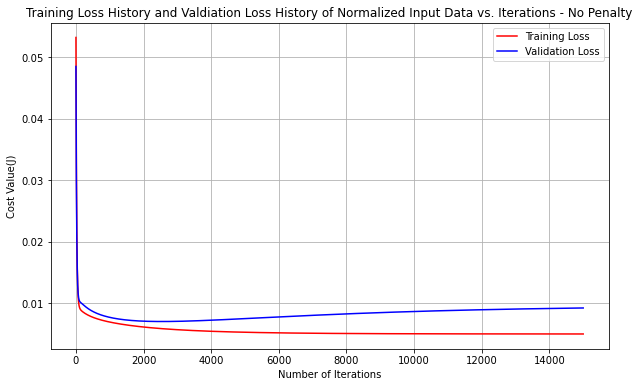

Final Training Loss Value : 0.0049592331208311
Final Validation Loss Value:  0.00919124004806916



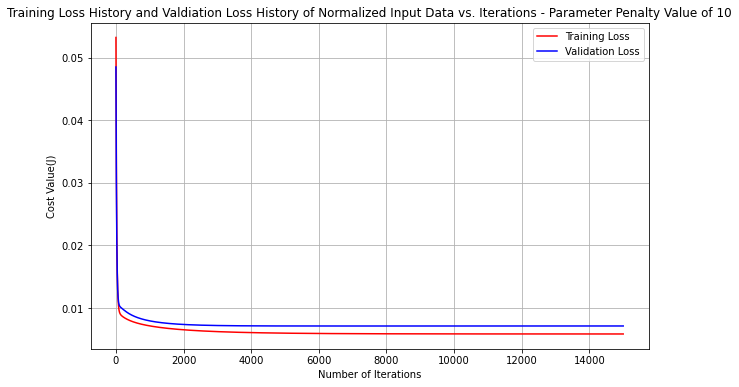

Final Training Loss Value : 0.005854964788099586
Final Validation Loss Value:  0.00713242576220047


In [43]:
epochs = gradient_descent_norm_inputs_2b['epochs']
plt.plot(range(1,epochs+1), gradient_descent_norm_inputs_2b['training_loss_history'], label="Training Loss", color='red')
plt.plot(range(1,epochs+1), gradient_descent_norm_inputs_2b['validation_loss_history'], label="Validation Loss", color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Value(J)")
plt.legend()
plt.title("Training Loss History and Valdiation Loss History of Normalized Input Data vs. Iterations - No Penalty")
plt.show()
print("Final Training Loss Value :", gradient_descent_norm_inputs_2b['training_loss_history'][-1])
print("Final Validation Loss Value: ", gradient_descent_norm_inputs_2b['validation_loss_history'][-1])
print("")  # For Display Formatting

epochs = gradient_descent_norm_inputs_3b['epochs']
plt.plot(range(1, epochs+1), gradient_descent_norm_inputs_3b['training_loss_history'], label="Training Loss", color='red')
plt.plot(range(1, epochs+1), gradient_descent_norm_inputs_3b['validation_loss_history'], label="Validation Loss", color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Value(J)")
plt.legend()
plt.title("Training Loss History and Valdiation Loss History of Normalized Input Data vs. Iterations - Parameter Penalty Value of {}".format(gradient_descent_norm_inputs_3b['penalty']))
plt.show()
print("Final Training Loss Value :", gradient_descent_norm_inputs_3b['training_loss_history'][-1])
print("Final Validation Loss Value: ", gradient_descent_norm_inputs_3b['validation_loss_history'][-1])


In the code block immediately above, the first figure shows the training and validation loss trends with no parameters penalty applied. The second figure above shows the training and validation loss trends with a parameters penalty applied with a lamda of 10. As previously mentioned in the answer to question 2b, the training loss trend tends to decrease over iterations, whereas the validation loss trend tends to increase over iterations (until convergence). This phenonmenon is an indicator that there is slight overfitting of the linear regression model during training.  

As illustrated in the second figure in the code block immediately above, it is observed that the validation loss trend decreases over iterations in a very similar fashion to the associated training loss trend. Essentially, both the validation loss and the training loss decrease over iterations in tandem. It was also observed in these results that the final validation loss(0.0071324)during training with a parameters penalty is now lower than the final validation loss(0.0091912) during training with no parameters penalty. However, it is also observed that the final training loss (0.005854) for training with a parameters penalty is larger than the final training loss (0.004959)for training without a parameters penalty. These three observations provide indication that the parameters penalty added in the training improved the generalization capability of the linear regression model. It was also observed that as one add a parameters penalty during, there is a slight increase in training loss. This is considered a tradeoff with the parameters penalty.